In [75]:
import tensorflow.examples.tutorials.mnist as mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random

In [76]:
%matplotlib inline

#### Dataset info

In [77]:
# source: http://yann.lecun.com/exdb/mnist/
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
NUM_CHANNELS = 1
PIXEL_DEPTH = 255
NUM_LABELS = 10

#### Loading files
Data is already preprocessed, shuffled and normalized.

In [78]:
mnist_dataset = mnist.input_data.read_data_sets('tensorflow/examples/tutorials/mnist', one_hot=True, validation_size=0)

Extracting tensorflow/examples/tutorials/mnist/train-images-idx3-ubyte.gz
Extracting tensorflow/examples/tutorials/mnist/train-labels-idx1-ubyte.gz
Extracting tensorflow/examples/tutorials/mnist/t10k-images-idx3-ubyte.gz
Extracting tensorflow/examples/tutorials/mnist/t10k-labels-idx1-ubyte.gz


#### Data preparation

In [79]:
images_for_autoencoder = mnist_dataset.train.images
images_for_autoencoder_labels = mnist_dataset.train.labels.astype(np.float32)

test_images = mnist_dataset.test.images
test_images_labels = mnist_dataset.test.labels.astype(np.float32)

In [80]:
IMAGES_NUM = images_for_autoencoder.shape[0]

#### Data presentation

In [81]:
def show_digit(trainX, trainY, index):
    image = trainX[index].reshape([IMAGE_WIDTH, IMAGE_HEIGHT])
    label = trainY[index]
    plt.title("Training data, index: {},  Label: {}".format(index, label))
    plt.imshow(image, cmap="gray_r")
    plt.show()

Images: (60000, 784)
Labels: (60000, 10)


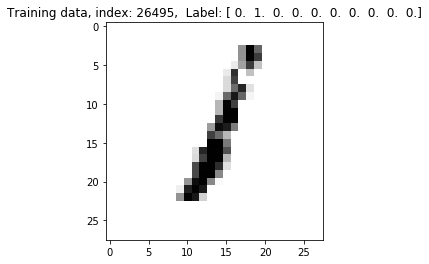

In [82]:
print("Images: " + str(images_for_autoencoder.shape))
print("Labels: " + str(images_for_autoencoder_labels.shape))
show_digit(images_for_autoencoder, images_for_autoencoder_labels, np.random.randint(1, IMAGES_NUM + 1))

#### Building Autoencoder

In [83]:
# reset tensorflow graph
tf.reset_default_graph()

In [84]:
inputs_ = tf.placeholder(tf.float32, [None, IMAGE_WIDTH * IMAGE_HEIGHT], "inputs")
targets_ = tf.placeholder(tf.float32, [None, IMAGE_WIDTH * IMAGE_HEIGHT], "targets")
learning_rate_ = tf.placeholder(tf.float32, None, name="learning_rate")

#### Encoder part

In [85]:
encoding_size = 64

In [86]:
# 28 * 28 MNIST image will be encoded into 'encoding_size' numbers
encoder_logits = tf.layers.dense(inputs_, encoding_size, activation=None)
encoded = tf.nn.relu(encoder_logits)

#### Decoder part

In [87]:
# 'encoding_size' numbers will be decoded into normalized image
decoder_logits = tf.layers.dense(encoded, IMAGE_WIDTH * IMAGE_HEIGHT, activation=None)
decoded = activation=tf.nn.sigmoid(decoder_logits)

#### Cost function and optimizer

In [88]:
# loss function
loss_value = tf.nn.sigmoid_cross_entropy_with_logits(logits=decoder_logits, labels=targets_)
cost_value = tf.reduce_mean(loss_value)

# gradient descent optimizer
optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost_value)

#### Hyperparameters

In [89]:
epochs = 30
batch_size = 48
num_batches = IMAGES_NUM // batch_size
learning_rate = 0.0005

#### Prepare batches

In [90]:
def prepare_mini_batches(data, labels, batch_size):
    assert len(data) == len(labels)
    
    all_batches = list()
    for i in range(0, len(data)):
        all_batches.append((data[i], labels[i]))
    random.shuffle(all_batches)
        
    mini_batches = list()
    while len(all_batches) >= batch_size:
        
        data_batch = list()
        labels_batch = list()
        for j in range(0, batch_size):
            data, labels = all_batches.pop()
            data_batch.append(data)
            labels_batch.append(labels)
            
        mini_batches.append((np.array(data_batch), np.array(labels_batch)))
    
    return mini_batches

#### Training cycle

In [91]:
session = tf.Session()

In [92]:
info = {'losses':[]}

session.run(tf.global_variables_initializer())
for epoch in range(epochs):
    mini_batches = prepare_mini_batches(images_for_autoencoder, images_for_autoencoder_labels, batch_size)

    epoch_losses = []
    while mini_batches:
        data_inputs, data_labels = mini_batches.pop()
        
        # target for net is to decrease image size (encode) and return the same image as inserted (decode)
        session.run(optimizer, feed_dict={inputs_: data_inputs, 
                                          targets_: data_inputs, 
                                          learning_rate_: learning_rate})
        
        batch_loss = session.run(cost_value, feed_dict={inputs_: data_inputs, 
                                                        targets_: data_inputs})
        epoch_losses.append(batch_loss)
    
        print("Epoch: {}/{}...".format(epoch + 1, epochs),
              "Training loss: {:.4f}".format(batch_loss))
        
    info['losses'].extend(epoch_losses)

Epoch: 1/30... Training loss: 0.6915
Epoch: 1/30... Training loss: 0.6889
Epoch: 1/30... Training loss: 0.6861
Epoch: 1/30... Training loss: 0.6831
Epoch: 1/30... Training loss: 0.6797
Epoch: 1/30... Training loss: 0.6757
Epoch: 1/30... Training loss: 0.6723
Epoch: 1/30... Training loss: 0.6675
Epoch: 1/30... Training loss: 0.6626
Epoch: 1/30... Training loss: 0.6559
Epoch: 1/30... Training loss: 0.6493
Epoch: 1/30... Training loss: 0.6427
Epoch: 1/30... Training loss: 0.6325
Epoch: 1/30... Training loss: 0.6235
Epoch: 1/30... Training loss: 0.6146
Epoch: 1/30... Training loss: 0.6076
Epoch: 1/30... Training loss: 0.5938
Epoch: 1/30... Training loss: 0.5855
Epoch: 1/30... Training loss: 0.5768
Epoch: 1/30... Training loss: 0.5591
Epoch: 1/30... Training loss: 0.5464
Epoch: 1/30... Training loss: 0.5406
Epoch: 1/30... Training loss: 0.5218
Epoch: 1/30... Training loss: 0.5087
Epoch: 1/30... Training loss: 0.4983
Epoch: 1/30... Training loss: 0.4808
Epoch: 1/30... Training loss: 0.4725
E

Epoch: 1/30... Training loss: 0.2144
Epoch: 1/30... Training loss: 0.2043
Epoch: 1/30... Training loss: 0.2117
Epoch: 1/30... Training loss: 0.2033
Epoch: 1/30... Training loss: 0.2132
Epoch: 1/30... Training loss: 0.2078
Epoch: 1/30... Training loss: 0.2094
Epoch: 1/30... Training loss: 0.2142
Epoch: 1/30... Training loss: 0.2006
Epoch: 1/30... Training loss: 0.2014
Epoch: 1/30... Training loss: 0.2031
Epoch: 1/30... Training loss: 0.2030
Epoch: 1/30... Training loss: 0.2102
Epoch: 1/30... Training loss: 0.2152
Epoch: 1/30... Training loss: 0.2129
Epoch: 1/30... Training loss: 0.2139
Epoch: 1/30... Training loss: 0.2025
Epoch: 1/30... Training loss: 0.2083
Epoch: 1/30... Training loss: 0.2058
Epoch: 1/30... Training loss: 0.2084
Epoch: 1/30... Training loss: 0.2058
Epoch: 1/30... Training loss: 0.1997
Epoch: 1/30... Training loss: 0.2166
Epoch: 1/30... Training loss: 0.1962
Epoch: 1/30... Training loss: 0.1996
Epoch: 1/30... Training loss: 0.1964
Epoch: 1/30... Training loss: 0.2065
E

Epoch: 1/30... Training loss: 0.1702
Epoch: 1/30... Training loss: 0.1689
Epoch: 1/30... Training loss: 0.1693
Epoch: 1/30... Training loss: 0.1771
Epoch: 1/30... Training loss: 0.1591
Epoch: 1/30... Training loss: 0.1662
Epoch: 1/30... Training loss: 0.1723
Epoch: 1/30... Training loss: 0.1680
Epoch: 1/30... Training loss: 0.1713
Epoch: 1/30... Training loss: 0.1664
Epoch: 1/30... Training loss: 0.1752
Epoch: 1/30... Training loss: 0.1776
Epoch: 1/30... Training loss: 0.1652
Epoch: 1/30... Training loss: 0.1735
Epoch: 1/30... Training loss: 0.1681
Epoch: 1/30... Training loss: 0.1642
Epoch: 1/30... Training loss: 0.1676
Epoch: 1/30... Training loss: 0.1626
Epoch: 1/30... Training loss: 0.1723
Epoch: 1/30... Training loss: 0.1714
Epoch: 1/30... Training loss: 0.1677
Epoch: 1/30... Training loss: 0.1634
Epoch: 1/30... Training loss: 0.1669
Epoch: 1/30... Training loss: 0.1576
Epoch: 1/30... Training loss: 0.1732
Epoch: 1/30... Training loss: 0.1728
Epoch: 1/30... Training loss: 0.1609
E

Epoch: 1/30... Training loss: 0.1647
Epoch: 1/30... Training loss: 0.1467
Epoch: 1/30... Training loss: 0.1408
Epoch: 1/30... Training loss: 0.1649
Epoch: 1/30... Training loss: 0.1546
Epoch: 1/30... Training loss: 0.1496
Epoch: 1/30... Training loss: 0.1486
Epoch: 1/30... Training loss: 0.1560
Epoch: 1/30... Training loss: 0.1485
Epoch: 1/30... Training loss: 0.1527
Epoch: 1/30... Training loss: 0.1572
Epoch: 1/30... Training loss: 0.1499
Epoch: 1/30... Training loss: 0.1562
Epoch: 1/30... Training loss: 0.1611
Epoch: 1/30... Training loss: 0.1484
Epoch: 1/30... Training loss: 0.1455
Epoch: 1/30... Training loss: 0.1562
Epoch: 1/30... Training loss: 0.1464
Epoch: 1/30... Training loss: 0.1543
Epoch: 1/30... Training loss: 0.1496
Epoch: 1/30... Training loss: 0.1535
Epoch: 1/30... Training loss: 0.1440
Epoch: 1/30... Training loss: 0.1540
Epoch: 1/30... Training loss: 0.1427
Epoch: 1/30... Training loss: 0.1427
Epoch: 1/30... Training loss: 0.1445
Epoch: 1/30... Training loss: 0.1463
E

Epoch: 1/30... Training loss: 0.1359
Epoch: 1/30... Training loss: 0.1358
Epoch: 1/30... Training loss: 0.1346
Epoch: 1/30... Training loss: 0.1312
Epoch: 1/30... Training loss: 0.1277
Epoch: 1/30... Training loss: 0.1360
Epoch: 1/30... Training loss: 0.1307
Epoch: 1/30... Training loss: 0.1441
Epoch: 1/30... Training loss: 0.1332
Epoch: 1/30... Training loss: 0.1401
Epoch: 1/30... Training loss: 0.1321
Epoch: 1/30... Training loss: 0.1461
Epoch: 1/30... Training loss: 0.1278
Epoch: 1/30... Training loss: 0.1353
Epoch: 1/30... Training loss: 0.1324
Epoch: 1/30... Training loss: 0.1382
Epoch: 1/30... Training loss: 0.1357
Epoch: 1/30... Training loss: 0.1412
Epoch: 1/30... Training loss: 0.1343
Epoch: 1/30... Training loss: 0.1366
Epoch: 1/30... Training loss: 0.1275
Epoch: 1/30... Training loss: 0.1285
Epoch: 1/30... Training loss: 0.1516
Epoch: 1/30... Training loss: 0.1343
Epoch: 1/30... Training loss: 0.1241
Epoch: 1/30... Training loss: 0.1272
Epoch: 1/30... Training loss: 0.1371
E

Epoch: 2/30... Training loss: 0.1288
Epoch: 2/30... Training loss: 0.1148
Epoch: 2/30... Training loss: 0.1198
Epoch: 2/30... Training loss: 0.1210
Epoch: 2/30... Training loss: 0.1305
Epoch: 2/30... Training loss: 0.1173
Epoch: 2/30... Training loss: 0.1326
Epoch: 2/30... Training loss: 0.1252
Epoch: 2/30... Training loss: 0.1274
Epoch: 2/30... Training loss: 0.1265
Epoch: 2/30... Training loss: 0.1147
Epoch: 2/30... Training loss: 0.1362
Epoch: 2/30... Training loss: 0.1193
Epoch: 2/30... Training loss: 0.1255
Epoch: 2/30... Training loss: 0.1280
Epoch: 2/30... Training loss: 0.1197
Epoch: 2/30... Training loss: 0.1195
Epoch: 2/30... Training loss: 0.1227
Epoch: 2/30... Training loss: 0.1214
Epoch: 2/30... Training loss: 0.1230
Epoch: 2/30... Training loss: 0.1275
Epoch: 2/30... Training loss: 0.1339
Epoch: 2/30... Training loss: 0.1261
Epoch: 2/30... Training loss: 0.1267
Epoch: 2/30... Training loss: 0.1267
Epoch: 2/30... Training loss: 0.1143
Epoch: 2/30... Training loss: 0.1213
E

Epoch: 2/30... Training loss: 0.1159
Epoch: 2/30... Training loss: 0.1195
Epoch: 2/30... Training loss: 0.1237
Epoch: 2/30... Training loss: 0.1126
Epoch: 2/30... Training loss: 0.1145
Epoch: 2/30... Training loss: 0.1148
Epoch: 2/30... Training loss: 0.1131
Epoch: 2/30... Training loss: 0.1148
Epoch: 2/30... Training loss: 0.1188
Epoch: 2/30... Training loss: 0.1186
Epoch: 2/30... Training loss: 0.1238
Epoch: 2/30... Training loss: 0.1151
Epoch: 2/30... Training loss: 0.1149
Epoch: 2/30... Training loss: 0.1160
Epoch: 2/30... Training loss: 0.1120
Epoch: 2/30... Training loss: 0.1195
Epoch: 2/30... Training loss: 0.1203
Epoch: 2/30... Training loss: 0.1176
Epoch: 2/30... Training loss: 0.1183
Epoch: 2/30... Training loss: 0.1175
Epoch: 2/30... Training loss: 0.1217
Epoch: 2/30... Training loss: 0.1125
Epoch: 2/30... Training loss: 0.1108
Epoch: 2/30... Training loss: 0.1124
Epoch: 2/30... Training loss: 0.1205
Epoch: 2/30... Training loss: 0.1233
Epoch: 2/30... Training loss: 0.1150
E

Epoch: 2/30... Training loss: 0.1088
Epoch: 2/30... Training loss: 0.1105
Epoch: 2/30... Training loss: 0.1154
Epoch: 2/30... Training loss: 0.1113
Epoch: 2/30... Training loss: 0.1091
Epoch: 2/30... Training loss: 0.1108
Epoch: 2/30... Training loss: 0.1130
Epoch: 2/30... Training loss: 0.1017
Epoch: 2/30... Training loss: 0.0953
Epoch: 2/30... Training loss: 0.1100
Epoch: 2/30... Training loss: 0.1095
Epoch: 2/30... Training loss: 0.1038
Epoch: 2/30... Training loss: 0.1106
Epoch: 2/30... Training loss: 0.1130
Epoch: 2/30... Training loss: 0.1127
Epoch: 2/30... Training loss: 0.1132
Epoch: 2/30... Training loss: 0.1107
Epoch: 2/30... Training loss: 0.1027
Epoch: 2/30... Training loss: 0.1044
Epoch: 2/30... Training loss: 0.1092
Epoch: 2/30... Training loss: 0.1026
Epoch: 2/30... Training loss: 0.1097
Epoch: 2/30... Training loss: 0.1091
Epoch: 2/30... Training loss: 0.1028
Epoch: 2/30... Training loss: 0.1112
Epoch: 2/30... Training loss: 0.1087
Epoch: 2/30... Training loss: 0.1114
E

Epoch: 2/30... Training loss: 0.1038
Epoch: 2/30... Training loss: 0.1013
Epoch: 2/30... Training loss: 0.1019
Epoch: 2/30... Training loss: 0.1042
Epoch: 2/30... Training loss: 0.1025
Epoch: 2/30... Training loss: 0.1078
Epoch: 2/30... Training loss: 0.0986
Epoch: 2/30... Training loss: 0.1039
Epoch: 2/30... Training loss: 0.1087
Epoch: 2/30... Training loss: 0.1054
Epoch: 2/30... Training loss: 0.1063
Epoch: 2/30... Training loss: 0.0944
Epoch: 2/30... Training loss: 0.1047
Epoch: 2/30... Training loss: 0.1079
Epoch: 2/30... Training loss: 0.1014
Epoch: 2/30... Training loss: 0.1058
Epoch: 2/30... Training loss: 0.1027
Epoch: 2/30... Training loss: 0.0999
Epoch: 2/30... Training loss: 0.1028
Epoch: 2/30... Training loss: 0.1044
Epoch: 2/30... Training loss: 0.1080
Epoch: 2/30... Training loss: 0.1017
Epoch: 2/30... Training loss: 0.1097
Epoch: 2/30... Training loss: 0.1063
Epoch: 2/30... Training loss: 0.1026
Epoch: 2/30... Training loss: 0.0985
Epoch: 2/30... Training loss: 0.1134
E

Epoch: 2/30... Training loss: 0.0982
Epoch: 2/30... Training loss: 0.0989
Epoch: 2/30... Training loss: 0.0982
Epoch: 2/30... Training loss: 0.0942
Epoch: 2/30... Training loss: 0.0946
Epoch: 2/30... Training loss: 0.1048
Epoch: 2/30... Training loss: 0.0906
Epoch: 2/30... Training loss: 0.0959
Epoch: 2/30... Training loss: 0.0983
Epoch: 2/30... Training loss: 0.0983
Epoch: 2/30... Training loss: 0.0919
Epoch: 2/30... Training loss: 0.0883
Epoch: 2/30... Training loss: 0.0988
Epoch: 2/30... Training loss: 0.0938
Epoch: 2/30... Training loss: 0.1054
Epoch: 2/30... Training loss: 0.1000
Epoch: 2/30... Training loss: 0.1058
Epoch: 2/30... Training loss: 0.0978
Epoch: 2/30... Training loss: 0.1024
Epoch: 2/30... Training loss: 0.1035
Epoch: 2/30... Training loss: 0.0976
Epoch: 2/30... Training loss: 0.0981
Epoch: 2/30... Training loss: 0.0971
Epoch: 2/30... Training loss: 0.0994
Epoch: 2/30... Training loss: 0.0910
Epoch: 2/30... Training loss: 0.1029
Epoch: 2/30... Training loss: 0.0948
E

Epoch: 3/30... Training loss: 0.0968
Epoch: 3/30... Training loss: 0.1019
Epoch: 3/30... Training loss: 0.0913
Epoch: 3/30... Training loss: 0.1019
Epoch: 3/30... Training loss: 0.0980
Epoch: 3/30... Training loss: 0.0993
Epoch: 3/30... Training loss: 0.1043
Epoch: 3/30... Training loss: 0.0963
Epoch: 3/30... Training loss: 0.0950
Epoch: 3/30... Training loss: 0.0971
Epoch: 3/30... Training loss: 0.0925
Epoch: 3/30... Training loss: 0.0911
Epoch: 3/30... Training loss: 0.0882
Epoch: 3/30... Training loss: 0.1001
Epoch: 3/30... Training loss: 0.0971
Epoch: 3/30... Training loss: 0.1000
Epoch: 3/30... Training loss: 0.0975
Epoch: 3/30... Training loss: 0.0970
Epoch: 3/30... Training loss: 0.0961
Epoch: 3/30... Training loss: 0.0988
Epoch: 3/30... Training loss: 0.0915
Epoch: 3/30... Training loss: 0.1001
Epoch: 3/30... Training loss: 0.0939
Epoch: 3/30... Training loss: 0.0994
Epoch: 3/30... Training loss: 0.0946
Epoch: 3/30... Training loss: 0.0945
Epoch: 3/30... Training loss: 0.0977
E

Epoch: 3/30... Training loss: 0.0879
Epoch: 3/30... Training loss: 0.0909
Epoch: 3/30... Training loss: 0.0872
Epoch: 3/30... Training loss: 0.0902
Epoch: 3/30... Training loss: 0.0954
Epoch: 3/30... Training loss: 0.0911
Epoch: 3/30... Training loss: 0.0894
Epoch: 3/30... Training loss: 0.0910
Epoch: 3/30... Training loss: 0.0897
Epoch: 3/30... Training loss: 0.0940
Epoch: 3/30... Training loss: 0.0963
Epoch: 3/30... Training loss: 0.0979
Epoch: 3/30... Training loss: 0.0947
Epoch: 3/30... Training loss: 0.0954
Epoch: 3/30... Training loss: 0.0917
Epoch: 3/30... Training loss: 0.0953
Epoch: 3/30... Training loss: 0.0916
Epoch: 3/30... Training loss: 0.0976
Epoch: 3/30... Training loss: 0.0914
Epoch: 3/30... Training loss: 0.0861
Epoch: 3/30... Training loss: 0.0941
Epoch: 3/30... Training loss: 0.0946
Epoch: 3/30... Training loss: 0.0930
Epoch: 3/30... Training loss: 0.0918
Epoch: 3/30... Training loss: 0.0842
Epoch: 3/30... Training loss: 0.0913
Epoch: 3/30... Training loss: 0.0874
E

Epoch: 3/30... Training loss: 0.0912
Epoch: 3/30... Training loss: 0.0864
Epoch: 3/30... Training loss: 0.0853
Epoch: 3/30... Training loss: 0.0971
Epoch: 3/30... Training loss: 0.0859
Epoch: 3/30... Training loss: 0.0943
Epoch: 3/30... Training loss: 0.0917
Epoch: 3/30... Training loss: 0.0929
Epoch: 3/30... Training loss: 0.0933
Epoch: 3/30... Training loss: 0.0873
Epoch: 3/30... Training loss: 0.0918
Epoch: 3/30... Training loss: 0.0925
Epoch: 3/30... Training loss: 0.0923
Epoch: 3/30... Training loss: 0.0892
Epoch: 3/30... Training loss: 0.1011
Epoch: 3/30... Training loss: 0.0922
Epoch: 3/30... Training loss: 0.0893
Epoch: 3/30... Training loss: 0.0901
Epoch: 3/30... Training loss: 0.0899
Epoch: 3/30... Training loss: 0.0909
Epoch: 3/30... Training loss: 0.0972
Epoch: 3/30... Training loss: 0.0891
Epoch: 3/30... Training loss: 0.0910
Epoch: 3/30... Training loss: 0.0898
Epoch: 3/30... Training loss: 0.0964
Epoch: 3/30... Training loss: 0.0858
Epoch: 3/30... Training loss: 0.0836
E

Epoch: 3/30... Training loss: 0.0910
Epoch: 3/30... Training loss: 0.0882
Epoch: 3/30... Training loss: 0.0907
Epoch: 3/30... Training loss: 0.0853
Epoch: 3/30... Training loss: 0.0820
Epoch: 3/30... Training loss: 0.0875
Epoch: 3/30... Training loss: 0.0943
Epoch: 3/30... Training loss: 0.0864
Epoch: 3/30... Training loss: 0.0832
Epoch: 3/30... Training loss: 0.0924
Epoch: 3/30... Training loss: 0.0911
Epoch: 3/30... Training loss: 0.0890
Epoch: 3/30... Training loss: 0.0842
Epoch: 3/30... Training loss: 0.0868
Epoch: 3/30... Training loss: 0.0829
Epoch: 3/30... Training loss: 0.0854
Epoch: 3/30... Training loss: 0.0914
Epoch: 3/30... Training loss: 0.0892
Epoch: 3/30... Training loss: 0.0907
Epoch: 3/30... Training loss: 0.0864
Epoch: 3/30... Training loss: 0.0923
Epoch: 3/30... Training loss: 0.0921
Epoch: 3/30... Training loss: 0.0840
Epoch: 3/30... Training loss: 0.0873
Epoch: 3/30... Training loss: 0.0870
Epoch: 3/30... Training loss: 0.0845
Epoch: 3/30... Training loss: 0.0913
E

Epoch: 3/30... Training loss: 0.0860
Epoch: 3/30... Training loss: 0.0831
Epoch: 3/30... Training loss: 0.0906
Epoch: 3/30... Training loss: 0.0890
Epoch: 3/30... Training loss: 0.0912
Epoch: 3/30... Training loss: 0.0880
Epoch: 3/30... Training loss: 0.0905
Epoch: 3/30... Training loss: 0.0838
Epoch: 3/30... Training loss: 0.0920
Epoch: 3/30... Training loss: 0.0833
Epoch: 3/30... Training loss: 0.0854
Epoch: 3/30... Training loss: 0.0901
Epoch: 3/30... Training loss: 0.0919
Epoch: 3/30... Training loss: 0.0888
Epoch: 3/30... Training loss: 0.0842
Epoch: 3/30... Training loss: 0.0875
Epoch: 3/30... Training loss: 0.0802
Epoch: 3/30... Training loss: 0.0928
Epoch: 3/30... Training loss: 0.0896
Epoch: 3/30... Training loss: 0.0854
Epoch: 3/30... Training loss: 0.0854
Epoch: 3/30... Training loss: 0.0838
Epoch: 3/30... Training loss: 0.0846
Epoch: 3/30... Training loss: 0.0838
Epoch: 3/30... Training loss: 0.0806
Epoch: 3/30... Training loss: 0.0875
Epoch: 3/30... Training loss: 0.0870
E

Epoch: 4/30... Training loss: 0.0810
Epoch: 4/30... Training loss: 0.0865
Epoch: 4/30... Training loss: 0.0850
Epoch: 4/30... Training loss: 0.0859
Epoch: 4/30... Training loss: 0.0841
Epoch: 4/30... Training loss: 0.0878
Epoch: 4/30... Training loss: 0.0844
Epoch: 4/30... Training loss: 0.0864
Epoch: 4/30... Training loss: 0.0846
Epoch: 4/30... Training loss: 0.0837
Epoch: 4/30... Training loss: 0.0854
Epoch: 4/30... Training loss: 0.0806
Epoch: 4/30... Training loss: 0.0807
Epoch: 4/30... Training loss: 0.0832
Epoch: 4/30... Training loss: 0.0811
Epoch: 4/30... Training loss: 0.0851
Epoch: 4/30... Training loss: 0.0826
Epoch: 4/30... Training loss: 0.0867
Epoch: 4/30... Training loss: 0.0896
Epoch: 4/30... Training loss: 0.0923
Epoch: 4/30... Training loss: 0.0837
Epoch: 4/30... Training loss: 0.0833
Epoch: 4/30... Training loss: 0.0856
Epoch: 4/30... Training loss: 0.0863
Epoch: 4/30... Training loss: 0.0897
Epoch: 4/30... Training loss: 0.0793
Epoch: 4/30... Training loss: 0.0849
E

Epoch: 4/30... Training loss: 0.0780
Epoch: 4/30... Training loss: 0.0807
Epoch: 4/30... Training loss: 0.0898
Epoch: 4/30... Training loss: 0.0794
Epoch: 4/30... Training loss: 0.0832
Epoch: 4/30... Training loss: 0.0843
Epoch: 4/30... Training loss: 0.0818
Epoch: 4/30... Training loss: 0.0779
Epoch: 4/30... Training loss: 0.0793
Epoch: 4/30... Training loss: 0.0832
Epoch: 4/30... Training loss: 0.0832
Epoch: 4/30... Training loss: 0.0848
Epoch: 4/30... Training loss: 0.0817
Epoch: 4/30... Training loss: 0.0776
Epoch: 4/30... Training loss: 0.0864
Epoch: 4/30... Training loss: 0.0816
Epoch: 4/30... Training loss: 0.0840
Epoch: 4/30... Training loss: 0.0827
Epoch: 4/30... Training loss: 0.0792
Epoch: 4/30... Training loss: 0.0869
Epoch: 4/30... Training loss: 0.0851
Epoch: 4/30... Training loss: 0.0841
Epoch: 4/30... Training loss: 0.0836
Epoch: 4/30... Training loss: 0.0857
Epoch: 4/30... Training loss: 0.0804
Epoch: 4/30... Training loss: 0.0793
Epoch: 4/30... Training loss: 0.0869
E

Epoch: 4/30... Training loss: 0.0788
Epoch: 4/30... Training loss: 0.0737
Epoch: 4/30... Training loss: 0.0791
Epoch: 4/30... Training loss: 0.0806
Epoch: 4/30... Training loss: 0.0822
Epoch: 4/30... Training loss: 0.0806
Epoch: 4/30... Training loss: 0.0750
Epoch: 4/30... Training loss: 0.0812
Epoch: 4/30... Training loss: 0.0803
Epoch: 4/30... Training loss: 0.0811
Epoch: 4/30... Training loss: 0.0776
Epoch: 4/30... Training loss: 0.0839
Epoch: 4/30... Training loss: 0.0842
Epoch: 4/30... Training loss: 0.0803
Epoch: 4/30... Training loss: 0.0762
Epoch: 4/30... Training loss: 0.0880
Epoch: 4/30... Training loss: 0.0831
Epoch: 4/30... Training loss: 0.0861
Epoch: 4/30... Training loss: 0.0770
Epoch: 4/30... Training loss: 0.0924
Epoch: 4/30... Training loss: 0.0844
Epoch: 4/30... Training loss: 0.0846
Epoch: 4/30... Training loss: 0.0820
Epoch: 4/30... Training loss: 0.0796
Epoch: 4/30... Training loss: 0.0853
Epoch: 4/30... Training loss: 0.0826
Epoch: 4/30... Training loss: 0.0804
E

Epoch: 4/30... Training loss: 0.0834
Epoch: 4/30... Training loss: 0.0776
Epoch: 4/30... Training loss: 0.0825
Epoch: 4/30... Training loss: 0.0801
Epoch: 4/30... Training loss: 0.0790
Epoch: 4/30... Training loss: 0.0761
Epoch: 4/30... Training loss: 0.0847
Epoch: 4/30... Training loss: 0.0797
Epoch: 4/30... Training loss: 0.0828
Epoch: 4/30... Training loss: 0.0796
Epoch: 4/30... Training loss: 0.0843
Epoch: 4/30... Training loss: 0.0808
Epoch: 4/30... Training loss: 0.0777
Epoch: 4/30... Training loss: 0.0852
Epoch: 4/30... Training loss: 0.0784
Epoch: 4/30... Training loss: 0.0775
Epoch: 4/30... Training loss: 0.0786
Epoch: 4/30... Training loss: 0.0807
Epoch: 4/30... Training loss: 0.0840
Epoch: 4/30... Training loss: 0.0830
Epoch: 4/30... Training loss: 0.0781
Epoch: 4/30... Training loss: 0.0835
Epoch: 4/30... Training loss: 0.0814
Epoch: 4/30... Training loss: 0.0732
Epoch: 4/30... Training loss: 0.0801
Epoch: 4/30... Training loss: 0.0790
Epoch: 4/30... Training loss: 0.0843
E

Epoch: 5/30... Training loss: 0.0796
Epoch: 5/30... Training loss: 0.0837
Epoch: 5/30... Training loss: 0.0799
Epoch: 5/30... Training loss: 0.0774
Epoch: 5/30... Training loss: 0.0755
Epoch: 5/30... Training loss: 0.0770
Epoch: 5/30... Training loss: 0.0763
Epoch: 5/30... Training loss: 0.0805
Epoch: 5/30... Training loss: 0.0793
Epoch: 5/30... Training loss: 0.0797
Epoch: 5/30... Training loss: 0.0748
Epoch: 5/30... Training loss: 0.0823
Epoch: 5/30... Training loss: 0.0810
Epoch: 5/30... Training loss: 0.0820
Epoch: 5/30... Training loss: 0.0770
Epoch: 5/30... Training loss: 0.0757
Epoch: 5/30... Training loss: 0.0805
Epoch: 5/30... Training loss: 0.0796
Epoch: 5/30... Training loss: 0.0761
Epoch: 5/30... Training loss: 0.0771
Epoch: 5/30... Training loss: 0.0785
Epoch: 5/30... Training loss: 0.0826
Epoch: 5/30... Training loss: 0.0793
Epoch: 5/30... Training loss: 0.0800
Epoch: 5/30... Training loss: 0.0782
Epoch: 5/30... Training loss: 0.0790
Epoch: 5/30... Training loss: 0.0831
E

Epoch: 5/30... Training loss: 0.0817
Epoch: 5/30... Training loss: 0.0771
Epoch: 5/30... Training loss: 0.0801
Epoch: 5/30... Training loss: 0.0809
Epoch: 5/30... Training loss: 0.0817
Epoch: 5/30... Training loss: 0.0829
Epoch: 5/30... Training loss: 0.0773
Epoch: 5/30... Training loss: 0.0812
Epoch: 5/30... Training loss: 0.0787
Epoch: 5/30... Training loss: 0.0786
Epoch: 5/30... Training loss: 0.0806
Epoch: 5/30... Training loss: 0.0737
Epoch: 5/30... Training loss: 0.0783
Epoch: 5/30... Training loss: 0.0862
Epoch: 5/30... Training loss: 0.0830
Epoch: 5/30... Training loss: 0.0799
Epoch: 5/30... Training loss: 0.0733
Epoch: 5/30... Training loss: 0.0780
Epoch: 5/30... Training loss: 0.0795
Epoch: 5/30... Training loss: 0.0759
Epoch: 5/30... Training loss: 0.0765
Epoch: 5/30... Training loss: 0.0796
Epoch: 5/30... Training loss: 0.0803
Epoch: 5/30... Training loss: 0.0865
Epoch: 5/30... Training loss: 0.0807
Epoch: 5/30... Training loss: 0.0814
Epoch: 5/30... Training loss: 0.0749
E

Epoch: 5/30... Training loss: 0.0808
Epoch: 5/30... Training loss: 0.0782
Epoch: 5/30... Training loss: 0.0744
Epoch: 5/30... Training loss: 0.0753
Epoch: 5/30... Training loss: 0.0772
Epoch: 5/30... Training loss: 0.0808
Epoch: 5/30... Training loss: 0.0818
Epoch: 5/30... Training loss: 0.0811
Epoch: 5/30... Training loss: 0.0791
Epoch: 5/30... Training loss: 0.0821
Epoch: 5/30... Training loss: 0.0774
Epoch: 5/30... Training loss: 0.0801
Epoch: 5/30... Training loss: 0.0861
Epoch: 5/30... Training loss: 0.0769
Epoch: 5/30... Training loss: 0.0778
Epoch: 5/30... Training loss: 0.0801
Epoch: 5/30... Training loss: 0.0757
Epoch: 5/30... Training loss: 0.0745
Epoch: 5/30... Training loss: 0.0800
Epoch: 5/30... Training loss: 0.0743
Epoch: 5/30... Training loss: 0.0816
Epoch: 5/30... Training loss: 0.0787
Epoch: 5/30... Training loss: 0.0818
Epoch: 5/30... Training loss: 0.0779
Epoch: 5/30... Training loss: 0.0817
Epoch: 5/30... Training loss: 0.0801
Epoch: 5/30... Training loss: 0.0743
E

Epoch: 5/30... Training loss: 0.0775
Epoch: 5/30... Training loss: 0.0774
Epoch: 5/30... Training loss: 0.0784
Epoch: 5/30... Training loss: 0.0767
Epoch: 5/30... Training loss: 0.0772
Epoch: 5/30... Training loss: 0.0883
Epoch: 5/30... Training loss: 0.0792
Epoch: 5/30... Training loss: 0.0750
Epoch: 5/30... Training loss: 0.0801
Epoch: 5/30... Training loss: 0.0805
Epoch: 5/30... Training loss: 0.0774
Epoch: 5/30... Training loss: 0.0854
Epoch: 5/30... Training loss: 0.0766
Epoch: 5/30... Training loss: 0.0779
Epoch: 5/30... Training loss: 0.0761
Epoch: 5/30... Training loss: 0.0784
Epoch: 5/30... Training loss: 0.0770
Epoch: 5/30... Training loss: 0.0782
Epoch: 5/30... Training loss: 0.0723
Epoch: 5/30... Training loss: 0.0774
Epoch: 5/30... Training loss: 0.0748
Epoch: 5/30... Training loss: 0.0727
Epoch: 5/30... Training loss: 0.0786
Epoch: 5/30... Training loss: 0.0770
Epoch: 5/30... Training loss: 0.0741
Epoch: 5/30... Training loss: 0.0775
Epoch: 5/30... Training loss: 0.0835
E

Epoch: 5/30... Training loss: 0.0759
Epoch: 5/30... Training loss: 0.0767
Epoch: 5/30... Training loss: 0.0836
Epoch: 5/30... Training loss: 0.0793
Epoch: 5/30... Training loss: 0.0743
Epoch: 5/30... Training loss: 0.0772
Epoch: 5/30... Training loss: 0.0766
Epoch: 5/30... Training loss: 0.0765
Epoch: 5/30... Training loss: 0.0735
Epoch: 5/30... Training loss: 0.0796
Epoch: 5/30... Training loss: 0.0806
Epoch: 5/30... Training loss: 0.0819
Epoch: 5/30... Training loss: 0.0798
Epoch: 5/30... Training loss: 0.0739
Epoch: 5/30... Training loss: 0.0764
Epoch: 5/30... Training loss: 0.0781
Epoch: 5/30... Training loss: 0.0825
Epoch: 5/30... Training loss: 0.0769
Epoch: 5/30... Training loss: 0.0756
Epoch: 5/30... Training loss: 0.0724
Epoch: 5/30... Training loss: 0.0796
Epoch: 5/30... Training loss: 0.0784
Epoch: 5/30... Training loss: 0.0803
Epoch: 5/30... Training loss: 0.0786
Epoch: 5/30... Training loss: 0.0803
Epoch: 5/30... Training loss: 0.0778
Epoch: 5/30... Training loss: 0.0780
E

Epoch: 6/30... Training loss: 0.0787
Epoch: 6/30... Training loss: 0.0754
Epoch: 6/30... Training loss: 0.0760
Epoch: 6/30... Training loss: 0.0774
Epoch: 6/30... Training loss: 0.0776
Epoch: 6/30... Training loss: 0.0804
Epoch: 6/30... Training loss: 0.0804
Epoch: 6/30... Training loss: 0.0774
Epoch: 6/30... Training loss: 0.0743
Epoch: 6/30... Training loss: 0.0776
Epoch: 6/30... Training loss: 0.0792
Epoch: 6/30... Training loss: 0.0742
Epoch: 6/30... Training loss: 0.0742
Epoch: 6/30... Training loss: 0.0748
Epoch: 6/30... Training loss: 0.0794
Epoch: 6/30... Training loss: 0.0778
Epoch: 6/30... Training loss: 0.0781
Epoch: 6/30... Training loss: 0.0781
Epoch: 6/30... Training loss: 0.0800
Epoch: 6/30... Training loss: 0.0737
Epoch: 6/30... Training loss: 0.0779
Epoch: 6/30... Training loss: 0.0738
Epoch: 6/30... Training loss: 0.0787
Epoch: 6/30... Training loss: 0.0824
Epoch: 6/30... Training loss: 0.0722
Epoch: 6/30... Training loss: 0.0753
Epoch: 6/30... Training loss: 0.0787
E

Epoch: 6/30... Training loss: 0.0719
Epoch: 6/30... Training loss: 0.0778
Epoch: 6/30... Training loss: 0.0726
Epoch: 6/30... Training loss: 0.0757
Epoch: 6/30... Training loss: 0.0770
Epoch: 6/30... Training loss: 0.0740
Epoch: 6/30... Training loss: 0.0761
Epoch: 6/30... Training loss: 0.0793
Epoch: 6/30... Training loss: 0.0782
Epoch: 6/30... Training loss: 0.0736
Epoch: 6/30... Training loss: 0.0736
Epoch: 6/30... Training loss: 0.0733
Epoch: 6/30... Training loss: 0.0747
Epoch: 6/30... Training loss: 0.0760
Epoch: 6/30... Training loss: 0.0748
Epoch: 6/30... Training loss: 0.0758
Epoch: 6/30... Training loss: 0.0757
Epoch: 6/30... Training loss: 0.0754
Epoch: 6/30... Training loss: 0.0765
Epoch: 6/30... Training loss: 0.0757
Epoch: 6/30... Training loss: 0.0778
Epoch: 6/30... Training loss: 0.0772
Epoch: 6/30... Training loss: 0.0780
Epoch: 6/30... Training loss: 0.0715
Epoch: 6/30... Training loss: 0.0751
Epoch: 6/30... Training loss: 0.0782
Epoch: 6/30... Training loss: 0.0778
E

Epoch: 6/30... Training loss: 0.0774
Epoch: 6/30... Training loss: 0.0763
Epoch: 6/30... Training loss: 0.0717
Epoch: 6/30... Training loss: 0.0739
Epoch: 6/30... Training loss: 0.0751
Epoch: 6/30... Training loss: 0.0714
Epoch: 6/30... Training loss: 0.0799
Epoch: 6/30... Training loss: 0.0778
Epoch: 6/30... Training loss: 0.0754
Epoch: 6/30... Training loss: 0.0717
Epoch: 6/30... Training loss: 0.0796
Epoch: 6/30... Training loss: 0.0758
Epoch: 6/30... Training loss: 0.0807
Epoch: 6/30... Training loss: 0.0852
Epoch: 6/30... Training loss: 0.0807
Epoch: 6/30... Training loss: 0.0751
Epoch: 6/30... Training loss: 0.0743
Epoch: 6/30... Training loss: 0.0753
Epoch: 6/30... Training loss: 0.0758
Epoch: 6/30... Training loss: 0.0768
Epoch: 6/30... Training loss: 0.0754
Epoch: 6/30... Training loss: 0.0802
Epoch: 6/30... Training loss: 0.0833
Epoch: 6/30... Training loss: 0.0718
Epoch: 6/30... Training loss: 0.0772
Epoch: 6/30... Training loss: 0.0828
Epoch: 6/30... Training loss: 0.0773
E

Epoch: 6/30... Training loss: 0.0714
Epoch: 6/30... Training loss: 0.0754
Epoch: 6/30... Training loss: 0.0813
Epoch: 6/30... Training loss: 0.0729
Epoch: 6/30... Training loss: 0.0730
Epoch: 6/30... Training loss: 0.0760
Epoch: 6/30... Training loss: 0.0716
Epoch: 6/30... Training loss: 0.0760
Epoch: 6/30... Training loss: 0.0790
Epoch: 6/30... Training loss: 0.0792
Epoch: 6/30... Training loss: 0.0757
Epoch: 6/30... Training loss: 0.0754
Epoch: 6/30... Training loss: 0.0824
Epoch: 6/30... Training loss: 0.0752
Epoch: 6/30... Training loss: 0.0742
Epoch: 6/30... Training loss: 0.0777
Epoch: 6/30... Training loss: 0.0706
Epoch: 6/30... Training loss: 0.0764
Epoch: 6/30... Training loss: 0.0748
Epoch: 6/30... Training loss: 0.0745
Epoch: 6/30... Training loss: 0.0732
Epoch: 6/30... Training loss: 0.0773
Epoch: 6/30... Training loss: 0.0714
Epoch: 6/30... Training loss: 0.0763
Epoch: 6/30... Training loss: 0.0723
Epoch: 6/30... Training loss: 0.0739
Epoch: 6/30... Training loss: 0.0705
E

Epoch: 7/30... Training loss: 0.0742
Epoch: 7/30... Training loss: 0.0784
Epoch: 7/30... Training loss: 0.0705
Epoch: 7/30... Training loss: 0.0760
Epoch: 7/30... Training loss: 0.0724
Epoch: 7/30... Training loss: 0.0802
Epoch: 7/30... Training loss: 0.0756
Epoch: 7/30... Training loss: 0.0756
Epoch: 7/30... Training loss: 0.0789
Epoch: 7/30... Training loss: 0.0772
Epoch: 7/30... Training loss: 0.0773
Epoch: 7/30... Training loss: 0.0731
Epoch: 7/30... Training loss: 0.0726
Epoch: 7/30... Training loss: 0.0791
Epoch: 7/30... Training loss: 0.0755
Epoch: 7/30... Training loss: 0.0773
Epoch: 7/30... Training loss: 0.0738
Epoch: 7/30... Training loss: 0.0744
Epoch: 7/30... Training loss: 0.0779
Epoch: 7/30... Training loss: 0.0793
Epoch: 7/30... Training loss: 0.0735
Epoch: 7/30... Training loss: 0.0808
Epoch: 7/30... Training loss: 0.0648
Epoch: 7/30... Training loss: 0.0767
Epoch: 7/30... Training loss: 0.0737
Epoch: 7/30... Training loss: 0.0758
Epoch: 7/30... Training loss: 0.0762
E

Epoch: 7/30... Training loss: 0.0787
Epoch: 7/30... Training loss: 0.0742
Epoch: 7/30... Training loss: 0.0781
Epoch: 7/30... Training loss: 0.0748
Epoch: 7/30... Training loss: 0.0760
Epoch: 7/30... Training loss: 0.0742
Epoch: 7/30... Training loss: 0.0789
Epoch: 7/30... Training loss: 0.0710
Epoch: 7/30... Training loss: 0.0787
Epoch: 7/30... Training loss: 0.0748
Epoch: 7/30... Training loss: 0.0754
Epoch: 7/30... Training loss: 0.0757
Epoch: 7/30... Training loss: 0.0766
Epoch: 7/30... Training loss: 0.0770
Epoch: 7/30... Training loss: 0.0790
Epoch: 7/30... Training loss: 0.0774
Epoch: 7/30... Training loss: 0.0790
Epoch: 7/30... Training loss: 0.0771
Epoch: 7/30... Training loss: 0.0731
Epoch: 7/30... Training loss: 0.0776
Epoch: 7/30... Training loss: 0.0763
Epoch: 7/30... Training loss: 0.0683
Epoch: 7/30... Training loss: 0.0715
Epoch: 7/30... Training loss: 0.0702
Epoch: 7/30... Training loss: 0.0792
Epoch: 7/30... Training loss: 0.0749
Epoch: 7/30... Training loss: 0.0804
E

Epoch: 7/30... Training loss: 0.0732
Epoch: 7/30... Training loss: 0.0718
Epoch: 7/30... Training loss: 0.0743
Epoch: 7/30... Training loss: 0.0814
Epoch: 7/30... Training loss: 0.0756
Epoch: 7/30... Training loss: 0.0748
Epoch: 7/30... Training loss: 0.0769
Epoch: 7/30... Training loss: 0.0817
Epoch: 7/30... Training loss: 0.0724
Epoch: 7/30... Training loss: 0.0717
Epoch: 7/30... Training loss: 0.0763
Epoch: 7/30... Training loss: 0.0791
Epoch: 7/30... Training loss: 0.0766
Epoch: 7/30... Training loss: 0.0715
Epoch: 7/30... Training loss: 0.0755
Epoch: 7/30... Training loss: 0.0742
Epoch: 7/30... Training loss: 0.0721
Epoch: 7/30... Training loss: 0.0737
Epoch: 7/30... Training loss: 0.0730
Epoch: 7/30... Training loss: 0.0732
Epoch: 7/30... Training loss: 0.0725
Epoch: 7/30... Training loss: 0.0793
Epoch: 7/30... Training loss: 0.0731
Epoch: 7/30... Training loss: 0.0733
Epoch: 7/30... Training loss: 0.0753
Epoch: 7/30... Training loss: 0.0780
Epoch: 7/30... Training loss: 0.0767
E

Epoch: 7/30... Training loss: 0.0755
Epoch: 7/30... Training loss: 0.0763
Epoch: 7/30... Training loss: 0.0716
Epoch: 7/30... Training loss: 0.0795
Epoch: 7/30... Training loss: 0.0726
Epoch: 7/30... Training loss: 0.0793
Epoch: 7/30... Training loss: 0.0735
Epoch: 7/30... Training loss: 0.0726
Epoch: 7/30... Training loss: 0.0741
Epoch: 7/30... Training loss: 0.0751
Epoch: 7/30... Training loss: 0.0794
Epoch: 7/30... Training loss: 0.0769
Epoch: 7/30... Training loss: 0.0788
Epoch: 7/30... Training loss: 0.0734
Epoch: 7/30... Training loss: 0.0687
Epoch: 7/30... Training loss: 0.0748
Epoch: 7/30... Training loss: 0.0785
Epoch: 7/30... Training loss: 0.0708
Epoch: 7/30... Training loss: 0.0721
Epoch: 7/30... Training loss: 0.0715
Epoch: 7/30... Training loss: 0.0726
Epoch: 7/30... Training loss: 0.0742
Epoch: 7/30... Training loss: 0.0775
Epoch: 7/30... Training loss: 0.0712
Epoch: 7/30... Training loss: 0.0734
Epoch: 7/30... Training loss: 0.0786
Epoch: 7/30... Training loss: 0.0749
E

Epoch: 7/30... Training loss: 0.0733
Epoch: 7/30... Training loss: 0.0771
Epoch: 7/30... Training loss: 0.0750
Epoch: 7/30... Training loss: 0.0749
Epoch: 7/30... Training loss: 0.0753
Epoch: 7/30... Training loss: 0.0732
Epoch: 7/30... Training loss: 0.0740
Epoch: 7/30... Training loss: 0.0823
Epoch: 7/30... Training loss: 0.0737
Epoch: 7/30... Training loss: 0.0746
Epoch: 7/30... Training loss: 0.0779
Epoch: 7/30... Training loss: 0.0832
Epoch: 7/30... Training loss: 0.0709
Epoch: 7/30... Training loss: 0.0685
Epoch: 7/30... Training loss: 0.0751
Epoch: 7/30... Training loss: 0.0743
Epoch: 7/30... Training loss: 0.0755
Epoch: 7/30... Training loss: 0.0709
Epoch: 7/30... Training loss: 0.0777
Epoch: 7/30... Training loss: 0.0745
Epoch: 7/30... Training loss: 0.0780
Epoch: 7/30... Training loss: 0.0726
Epoch: 7/30... Training loss: 0.0705
Epoch: 7/30... Training loss: 0.0736
Epoch: 7/30... Training loss: 0.0726
Epoch: 7/30... Training loss: 0.0721
Epoch: 7/30... Training loss: 0.0748
E

Epoch: 8/30... Training loss: 0.0762
Epoch: 8/30... Training loss: 0.0789
Epoch: 8/30... Training loss: 0.0725
Epoch: 8/30... Training loss: 0.0801
Epoch: 8/30... Training loss: 0.0805
Epoch: 8/30... Training loss: 0.0744
Epoch: 8/30... Training loss: 0.0723
Epoch: 8/30... Training loss: 0.0750
Epoch: 8/30... Training loss: 0.0668
Epoch: 8/30... Training loss: 0.0773
Epoch: 8/30... Training loss: 0.0764
Epoch: 8/30... Training loss: 0.0735
Epoch: 8/30... Training loss: 0.0752
Epoch: 8/30... Training loss: 0.0754
Epoch: 8/30... Training loss: 0.0740
Epoch: 8/30... Training loss: 0.0727
Epoch: 8/30... Training loss: 0.0734
Epoch: 8/30... Training loss: 0.0725
Epoch: 8/30... Training loss: 0.0720
Epoch: 8/30... Training loss: 0.0784
Epoch: 8/30... Training loss: 0.0691
Epoch: 8/30... Training loss: 0.0776
Epoch: 8/30... Training loss: 0.0787
Epoch: 8/30... Training loss: 0.0739
Epoch: 8/30... Training loss: 0.0776
Epoch: 8/30... Training loss: 0.0765
Epoch: 8/30... Training loss: 0.0720
E

Epoch: 8/30... Training loss: 0.0713
Epoch: 8/30... Training loss: 0.0788
Epoch: 8/30... Training loss: 0.0823
Epoch: 8/30... Training loss: 0.0765
Epoch: 8/30... Training loss: 0.0753
Epoch: 8/30... Training loss: 0.0769
Epoch: 8/30... Training loss: 0.0694
Epoch: 8/30... Training loss: 0.0737
Epoch: 8/30... Training loss: 0.0750
Epoch: 8/30... Training loss: 0.0766
Epoch: 8/30... Training loss: 0.0786
Epoch: 8/30... Training loss: 0.0729
Epoch: 8/30... Training loss: 0.0766
Epoch: 8/30... Training loss: 0.0744
Epoch: 8/30... Training loss: 0.0811
Epoch: 8/30... Training loss: 0.0716
Epoch: 8/30... Training loss: 0.0721
Epoch: 8/30... Training loss: 0.0744
Epoch: 8/30... Training loss: 0.0733
Epoch: 8/30... Training loss: 0.0751
Epoch: 8/30... Training loss: 0.0763
Epoch: 8/30... Training loss: 0.0730
Epoch: 8/30... Training loss: 0.0739
Epoch: 8/30... Training loss: 0.0777
Epoch: 8/30... Training loss: 0.0726
Epoch: 8/30... Training loss: 0.0787
Epoch: 8/30... Training loss: 0.0704
E

Epoch: 8/30... Training loss: 0.0789
Epoch: 8/30... Training loss: 0.0727
Epoch: 8/30... Training loss: 0.0791
Epoch: 8/30... Training loss: 0.0793
Epoch: 8/30... Training loss: 0.0809
Epoch: 8/30... Training loss: 0.0764
Epoch: 8/30... Training loss: 0.0774
Epoch: 8/30... Training loss: 0.0746
Epoch: 8/30... Training loss: 0.0686
Epoch: 8/30... Training loss: 0.0745
Epoch: 8/30... Training loss: 0.0783
Epoch: 8/30... Training loss: 0.0734
Epoch: 8/30... Training loss: 0.0768
Epoch: 8/30... Training loss: 0.0763
Epoch: 8/30... Training loss: 0.0690
Epoch: 8/30... Training loss: 0.0819
Epoch: 8/30... Training loss: 0.0758
Epoch: 8/30... Training loss: 0.0751
Epoch: 8/30... Training loss: 0.0741
Epoch: 8/30... Training loss: 0.0800
Epoch: 8/30... Training loss: 0.0768
Epoch: 8/30... Training loss: 0.0753
Epoch: 8/30... Training loss: 0.0773
Epoch: 8/30... Training loss: 0.0744
Epoch: 8/30... Training loss: 0.0766
Epoch: 8/30... Training loss: 0.0777
Epoch: 8/30... Training loss: 0.0767
E

Epoch: 8/30... Training loss: 0.0745
Epoch: 8/30... Training loss: 0.0723
Epoch: 8/30... Training loss: 0.0757
Epoch: 8/30... Training loss: 0.0769
Epoch: 8/30... Training loss: 0.0714
Epoch: 8/30... Training loss: 0.0773
Epoch: 8/30... Training loss: 0.0744
Epoch: 8/30... Training loss: 0.0731
Epoch: 8/30... Training loss: 0.0754
Epoch: 8/30... Training loss: 0.0710
Epoch: 8/30... Training loss: 0.0743
Epoch: 8/30... Training loss: 0.0728
Epoch: 8/30... Training loss: 0.0779
Epoch: 8/30... Training loss: 0.0729
Epoch: 8/30... Training loss: 0.0756
Epoch: 8/30... Training loss: 0.0778
Epoch: 8/30... Training loss: 0.0738
Epoch: 8/30... Training loss: 0.0752
Epoch: 8/30... Training loss: 0.0724
Epoch: 8/30... Training loss: 0.0687
Epoch: 8/30... Training loss: 0.0786
Epoch: 8/30... Training loss: 0.0758
Epoch: 8/30... Training loss: 0.0733
Epoch: 8/30... Training loss: 0.0743
Epoch: 8/30... Training loss: 0.0755
Epoch: 8/30... Training loss: 0.0700
Epoch: 8/30... Training loss: 0.0747
E

Epoch: 9/30... Training loss: 0.0733
Epoch: 9/30... Training loss: 0.0741
Epoch: 9/30... Training loss: 0.0718
Epoch: 9/30... Training loss: 0.0747
Epoch: 9/30... Training loss: 0.0760
Epoch: 9/30... Training loss: 0.0760
Epoch: 9/30... Training loss: 0.0810
Epoch: 9/30... Training loss: 0.0743
Epoch: 9/30... Training loss: 0.0708
Epoch: 9/30... Training loss: 0.0716
Epoch: 9/30... Training loss: 0.0728
Epoch: 9/30... Training loss: 0.0758
Epoch: 9/30... Training loss: 0.0769
Epoch: 9/30... Training loss: 0.0776
Epoch: 9/30... Training loss: 0.0776
Epoch: 9/30... Training loss: 0.0754
Epoch: 9/30... Training loss: 0.0760
Epoch: 9/30... Training loss: 0.0742
Epoch: 9/30... Training loss: 0.0741
Epoch: 9/30... Training loss: 0.0770
Epoch: 9/30... Training loss: 0.0788
Epoch: 9/30... Training loss: 0.0748
Epoch: 9/30... Training loss: 0.0711
Epoch: 9/30... Training loss: 0.0784
Epoch: 9/30... Training loss: 0.0718
Epoch: 9/30... Training loss: 0.0757
Epoch: 9/30... Training loss: 0.0730
E

Epoch: 9/30... Training loss: 0.0754
Epoch: 9/30... Training loss: 0.0754
Epoch: 9/30... Training loss: 0.0755
Epoch: 9/30... Training loss: 0.0720
Epoch: 9/30... Training loss: 0.0735
Epoch: 9/30... Training loss: 0.0799
Epoch: 9/30... Training loss: 0.0708
Epoch: 9/30... Training loss: 0.0749
Epoch: 9/30... Training loss: 0.0741
Epoch: 9/30... Training loss: 0.0714
Epoch: 9/30... Training loss: 0.0724
Epoch: 9/30... Training loss: 0.0799
Epoch: 9/30... Training loss: 0.0758
Epoch: 9/30... Training loss: 0.0755
Epoch: 9/30... Training loss: 0.0761
Epoch: 9/30... Training loss: 0.0760
Epoch: 9/30... Training loss: 0.0744
Epoch: 9/30... Training loss: 0.0734
Epoch: 9/30... Training loss: 0.0760
Epoch: 9/30... Training loss: 0.0770
Epoch: 9/30... Training loss: 0.0758
Epoch: 9/30... Training loss: 0.0714
Epoch: 9/30... Training loss: 0.0776
Epoch: 9/30... Training loss: 0.0721
Epoch: 9/30... Training loss: 0.0753
Epoch: 9/30... Training loss: 0.0733
Epoch: 9/30... Training loss: 0.0725
E

Epoch: 9/30... Training loss: 0.0759
Epoch: 9/30... Training loss: 0.0718
Epoch: 9/30... Training loss: 0.0728
Epoch: 9/30... Training loss: 0.0797
Epoch: 9/30... Training loss: 0.0696
Epoch: 9/30... Training loss: 0.0724
Epoch: 9/30... Training loss: 0.0755
Epoch: 9/30... Training loss: 0.0754
Epoch: 9/30... Training loss: 0.0725
Epoch: 9/30... Training loss: 0.0737
Epoch: 9/30... Training loss: 0.0695
Epoch: 9/30... Training loss: 0.0768
Epoch: 9/30... Training loss: 0.0756
Epoch: 9/30... Training loss: 0.0800
Epoch: 9/30... Training loss: 0.0717
Epoch: 9/30... Training loss: 0.0709
Epoch: 9/30... Training loss: 0.0675
Epoch: 9/30... Training loss: 0.0737
Epoch: 9/30... Training loss: 0.0787
Epoch: 9/30... Training loss: 0.0744
Epoch: 9/30... Training loss: 0.0759
Epoch: 9/30... Training loss: 0.0753
Epoch: 9/30... Training loss: 0.0758
Epoch: 9/30... Training loss: 0.0776
Epoch: 9/30... Training loss: 0.0739
Epoch: 9/30... Training loss: 0.0788
Epoch: 9/30... Training loss: 0.0747
E

Epoch: 9/30... Training loss: 0.0774
Epoch: 9/30... Training loss: 0.0704
Epoch: 9/30... Training loss: 0.0762
Epoch: 9/30... Training loss: 0.0815
Epoch: 9/30... Training loss: 0.0695
Epoch: 9/30... Training loss: 0.0773
Epoch: 9/30... Training loss: 0.0693
Epoch: 9/30... Training loss: 0.0723
Epoch: 9/30... Training loss: 0.0761
Epoch: 9/30... Training loss: 0.0793
Epoch: 9/30... Training loss: 0.0706
Epoch: 9/30... Training loss: 0.0795
Epoch: 9/30... Training loss: 0.0736
Epoch: 9/30... Training loss: 0.0731
Epoch: 9/30... Training loss: 0.0739
Epoch: 9/30... Training loss: 0.0733
Epoch: 9/30... Training loss: 0.0745
Epoch: 9/30... Training loss: 0.0708
Epoch: 9/30... Training loss: 0.0727
Epoch: 9/30... Training loss: 0.0764
Epoch: 9/30... Training loss: 0.0732
Epoch: 9/30... Training loss: 0.0699
Epoch: 9/30... Training loss: 0.0736
Epoch: 9/30... Training loss: 0.0706
Epoch: 9/30... Training loss: 0.0759
Epoch: 9/30... Training loss: 0.0686
Epoch: 9/30... Training loss: 0.0745
E

Epoch: 9/30... Training loss: 0.0746
Epoch: 9/30... Training loss: 0.0731
Epoch: 9/30... Training loss: 0.0705
Epoch: 9/30... Training loss: 0.0736
Epoch: 9/30... Training loss: 0.0757
Epoch: 9/30... Training loss: 0.0729
Epoch: 9/30... Training loss: 0.0721
Epoch: 9/30... Training loss: 0.0722
Epoch: 9/30... Training loss: 0.0739
Epoch: 9/30... Training loss: 0.0767
Epoch: 9/30... Training loss: 0.0745
Epoch: 9/30... Training loss: 0.0727
Epoch: 9/30... Training loss: 0.0794
Epoch: 9/30... Training loss: 0.0773
Epoch: 9/30... Training loss: 0.0780
Epoch: 9/30... Training loss: 0.0753
Epoch: 9/30... Training loss: 0.0783
Epoch: 9/30... Training loss: 0.0757
Epoch: 9/30... Training loss: 0.0689
Epoch: 9/30... Training loss: 0.0757
Epoch: 9/30... Training loss: 0.0757
Epoch: 9/30... Training loss: 0.0757
Epoch: 9/30... Training loss: 0.0737
Epoch: 9/30... Training loss: 0.0775
Epoch: 9/30... Training loss: 0.0760
Epoch: 9/30... Training loss: 0.0783
Epoch: 9/30... Training loss: 0.0723
E

Epoch: 10/30... Training loss: 0.0737
Epoch: 10/30... Training loss: 0.0690
Epoch: 10/30... Training loss: 0.0744
Epoch: 10/30... Training loss: 0.0726
Epoch: 10/30... Training loss: 0.0757
Epoch: 10/30... Training loss: 0.0758
Epoch: 10/30... Training loss: 0.0722
Epoch: 10/30... Training loss: 0.0740
Epoch: 10/30... Training loss: 0.0742
Epoch: 10/30... Training loss: 0.0740
Epoch: 10/30... Training loss: 0.0739
Epoch: 10/30... Training loss: 0.0733
Epoch: 10/30... Training loss: 0.0708
Epoch: 10/30... Training loss: 0.0732
Epoch: 10/30... Training loss: 0.0678
Epoch: 10/30... Training loss: 0.0753
Epoch: 10/30... Training loss: 0.0754
Epoch: 10/30... Training loss: 0.0792
Epoch: 10/30... Training loss: 0.0740
Epoch: 10/30... Training loss: 0.0755
Epoch: 10/30... Training loss: 0.0741
Epoch: 10/30... Training loss: 0.0733
Epoch: 10/30... Training loss: 0.0764
Epoch: 10/30... Training loss: 0.0746
Epoch: 10/30... Training loss: 0.0710
Epoch: 10/30... Training loss: 0.0743
Epoch: 10/30

Epoch: 10/30... Training loss: 0.0778
Epoch: 10/30... Training loss: 0.0757
Epoch: 10/30... Training loss: 0.0727
Epoch: 10/30... Training loss: 0.0769
Epoch: 10/30... Training loss: 0.0789
Epoch: 10/30... Training loss: 0.0767
Epoch: 10/30... Training loss: 0.0738
Epoch: 10/30... Training loss: 0.0753
Epoch: 10/30... Training loss: 0.0735
Epoch: 10/30... Training loss: 0.0743
Epoch: 10/30... Training loss: 0.0734
Epoch: 10/30... Training loss: 0.0792
Epoch: 10/30... Training loss: 0.0779
Epoch: 10/30... Training loss: 0.0757
Epoch: 10/30... Training loss: 0.0769
Epoch: 10/30... Training loss: 0.0766
Epoch: 10/30... Training loss: 0.0717
Epoch: 10/30... Training loss: 0.0738
Epoch: 10/30... Training loss: 0.0722
Epoch: 10/30... Training loss: 0.0750
Epoch: 10/30... Training loss: 0.0736
Epoch: 10/30... Training loss: 0.0741
Epoch: 10/30... Training loss: 0.0751
Epoch: 10/30... Training loss: 0.0745
Epoch: 10/30... Training loss: 0.0714
Epoch: 10/30... Training loss: 0.0745
Epoch: 10/30

Epoch: 10/30... Training loss: 0.0712
Epoch: 10/30... Training loss: 0.0738
Epoch: 10/30... Training loss: 0.0740
Epoch: 10/30... Training loss: 0.0751
Epoch: 10/30... Training loss: 0.0713
Epoch: 10/30... Training loss: 0.0661
Epoch: 10/30... Training loss: 0.0754
Epoch: 10/30... Training loss: 0.0776
Epoch: 10/30... Training loss: 0.0770
Epoch: 10/30... Training loss: 0.0748
Epoch: 10/30... Training loss: 0.0737
Epoch: 10/30... Training loss: 0.0776
Epoch: 10/30... Training loss: 0.0731
Epoch: 10/30... Training loss: 0.0690
Epoch: 10/30... Training loss: 0.0718
Epoch: 10/30... Training loss: 0.0745
Epoch: 10/30... Training loss: 0.0710
Epoch: 10/30... Training loss: 0.0766
Epoch: 10/30... Training loss: 0.0706
Epoch: 10/30... Training loss: 0.0750
Epoch: 10/30... Training loss: 0.0763
Epoch: 10/30... Training loss: 0.0742
Epoch: 10/30... Training loss: 0.0796
Epoch: 10/30... Training loss: 0.0690
Epoch: 10/30... Training loss: 0.0729
Epoch: 10/30... Training loss: 0.0709
Epoch: 10/30

Epoch: 10/30... Training loss: 0.0734
Epoch: 10/30... Training loss: 0.0728
Epoch: 10/30... Training loss: 0.0738
Epoch: 10/30... Training loss: 0.0699
Epoch: 10/30... Training loss: 0.0808
Epoch: 10/30... Training loss: 0.0744
Epoch: 10/30... Training loss: 0.0739
Epoch: 10/30... Training loss: 0.0791
Epoch: 10/30... Training loss: 0.0707
Epoch: 10/30... Training loss: 0.0752
Epoch: 10/30... Training loss: 0.0740
Epoch: 10/30... Training loss: 0.0731
Epoch: 10/30... Training loss: 0.0717
Epoch: 10/30... Training loss: 0.0697
Epoch: 10/30... Training loss: 0.0709
Epoch: 10/30... Training loss: 0.0782
Epoch: 10/30... Training loss: 0.0777
Epoch: 10/30... Training loss: 0.0776
Epoch: 10/30... Training loss: 0.0734
Epoch: 10/30... Training loss: 0.0769
Epoch: 10/30... Training loss: 0.0748
Epoch: 10/30... Training loss: 0.0739
Epoch: 10/30... Training loss: 0.0748
Epoch: 10/30... Training loss: 0.0759
Epoch: 10/30... Training loss: 0.0710
Epoch: 10/30... Training loss: 0.0768
Epoch: 10/30

Epoch: 10/30... Training loss: 0.0750
Epoch: 11/30... Training loss: 0.0758
Epoch: 11/30... Training loss: 0.0746
Epoch: 11/30... Training loss: 0.0762
Epoch: 11/30... Training loss: 0.0788
Epoch: 11/30... Training loss: 0.0777
Epoch: 11/30... Training loss: 0.0734
Epoch: 11/30... Training loss: 0.0737
Epoch: 11/30... Training loss: 0.0720
Epoch: 11/30... Training loss: 0.0811
Epoch: 11/30... Training loss: 0.0788
Epoch: 11/30... Training loss: 0.0784
Epoch: 11/30... Training loss: 0.0739
Epoch: 11/30... Training loss: 0.0705
Epoch: 11/30... Training loss: 0.0727
Epoch: 11/30... Training loss: 0.0757
Epoch: 11/30... Training loss: 0.0759
Epoch: 11/30... Training loss: 0.0691
Epoch: 11/30... Training loss: 0.0737
Epoch: 11/30... Training loss: 0.0731
Epoch: 11/30... Training loss: 0.0728
Epoch: 11/30... Training loss: 0.0710
Epoch: 11/30... Training loss: 0.0760
Epoch: 11/30... Training loss: 0.0745
Epoch: 11/30... Training loss: 0.0740
Epoch: 11/30... Training loss: 0.0723
Epoch: 11/30

Epoch: 11/30... Training loss: 0.0714
Epoch: 11/30... Training loss: 0.0747
Epoch: 11/30... Training loss: 0.0699
Epoch: 11/30... Training loss: 0.0748
Epoch: 11/30... Training loss: 0.0781
Epoch: 11/30... Training loss: 0.0698
Epoch: 11/30... Training loss: 0.0705
Epoch: 11/30... Training loss: 0.0764
Epoch: 11/30... Training loss: 0.0694
Epoch: 11/30... Training loss: 0.0737
Epoch: 11/30... Training loss: 0.0719
Epoch: 11/30... Training loss: 0.0692
Epoch: 11/30... Training loss: 0.0737
Epoch: 11/30... Training loss: 0.0769
Epoch: 11/30... Training loss: 0.0770
Epoch: 11/30... Training loss: 0.0731
Epoch: 11/30... Training loss: 0.0698
Epoch: 11/30... Training loss: 0.0749
Epoch: 11/30... Training loss: 0.0742
Epoch: 11/30... Training loss: 0.0756
Epoch: 11/30... Training loss: 0.0812
Epoch: 11/30... Training loss: 0.0762
Epoch: 11/30... Training loss: 0.0724
Epoch: 11/30... Training loss: 0.0786
Epoch: 11/30... Training loss: 0.0722
Epoch: 11/30... Training loss: 0.0743
Epoch: 11/30

Epoch: 11/30... Training loss: 0.0740
Epoch: 11/30... Training loss: 0.0751
Epoch: 11/30... Training loss: 0.0787
Epoch: 11/30... Training loss: 0.0759
Epoch: 11/30... Training loss: 0.0781
Epoch: 11/30... Training loss: 0.0716
Epoch: 11/30... Training loss: 0.0720
Epoch: 11/30... Training loss: 0.0734
Epoch: 11/30... Training loss: 0.0745
Epoch: 11/30... Training loss: 0.0742
Epoch: 11/30... Training loss: 0.0766
Epoch: 11/30... Training loss: 0.0726
Epoch: 11/30... Training loss: 0.0706
Epoch: 11/30... Training loss: 0.0753
Epoch: 11/30... Training loss: 0.0768
Epoch: 11/30... Training loss: 0.0738
Epoch: 11/30... Training loss: 0.0702
Epoch: 11/30... Training loss: 0.0725
Epoch: 11/30... Training loss: 0.0722
Epoch: 11/30... Training loss: 0.0742
Epoch: 11/30... Training loss: 0.0705
Epoch: 11/30... Training loss: 0.0713
Epoch: 11/30... Training loss: 0.0764
Epoch: 11/30... Training loss: 0.0756
Epoch: 11/30... Training loss: 0.0757
Epoch: 11/30... Training loss: 0.0724
Epoch: 11/30

Epoch: 11/30... Training loss: 0.0738
Epoch: 11/30... Training loss: 0.0750
Epoch: 11/30... Training loss: 0.0733
Epoch: 11/30... Training loss: 0.0706
Epoch: 11/30... Training loss: 0.0685
Epoch: 11/30... Training loss: 0.0684
Epoch: 11/30... Training loss: 0.0745
Epoch: 11/30... Training loss: 0.0755
Epoch: 11/30... Training loss: 0.0750
Epoch: 11/30... Training loss: 0.0740
Epoch: 11/30... Training loss: 0.0721
Epoch: 11/30... Training loss: 0.0724
Epoch: 11/30... Training loss: 0.0750
Epoch: 11/30... Training loss: 0.0776
Epoch: 11/30... Training loss: 0.0739
Epoch: 11/30... Training loss: 0.0749
Epoch: 11/30... Training loss: 0.0734
Epoch: 11/30... Training loss: 0.0710
Epoch: 11/30... Training loss: 0.0713
Epoch: 11/30... Training loss: 0.0778
Epoch: 11/30... Training loss: 0.0712
Epoch: 11/30... Training loss: 0.0784
Epoch: 11/30... Training loss: 0.0701
Epoch: 11/30... Training loss: 0.0738
Epoch: 11/30... Training loss: 0.0719
Epoch: 11/30... Training loss: 0.0676
Epoch: 11/30

Epoch: 11/30... Training loss: 0.0724
Epoch: 11/30... Training loss: 0.0733
Epoch: 11/30... Training loss: 0.0701
Epoch: 11/30... Training loss: 0.0760
Epoch: 11/30... Training loss: 0.0750
Epoch: 11/30... Training loss: 0.0724
Epoch: 11/30... Training loss: 0.0729
Epoch: 11/30... Training loss: 0.0681
Epoch: 11/30... Training loss: 0.0740
Epoch: 11/30... Training loss: 0.0748
Epoch: 11/30... Training loss: 0.0763
Epoch: 11/30... Training loss: 0.0725
Epoch: 11/30... Training loss: 0.0789
Epoch: 11/30... Training loss: 0.0785
Epoch: 11/30... Training loss: 0.0725
Epoch: 11/30... Training loss: 0.0736
Epoch: 11/30... Training loss: 0.0702
Epoch: 11/30... Training loss: 0.0721
Epoch: 11/30... Training loss: 0.0723
Epoch: 11/30... Training loss: 0.0752
Epoch: 11/30... Training loss: 0.0765
Epoch: 11/30... Training loss: 0.0755
Epoch: 11/30... Training loss: 0.0745
Epoch: 11/30... Training loss: 0.0744
Epoch: 11/30... Training loss: 0.0676
Epoch: 11/30... Training loss: 0.0697
Epoch: 11/30

Epoch: 12/30... Training loss: 0.0702
Epoch: 12/30... Training loss: 0.0764
Epoch: 12/30... Training loss: 0.0716
Epoch: 12/30... Training loss: 0.0734
Epoch: 12/30... Training loss: 0.0753
Epoch: 12/30... Training loss: 0.0781
Epoch: 12/30... Training loss: 0.0736
Epoch: 12/30... Training loss: 0.0777
Epoch: 12/30... Training loss: 0.0743
Epoch: 12/30... Training loss: 0.0727
Epoch: 12/30... Training loss: 0.0755
Epoch: 12/30... Training loss: 0.0742
Epoch: 12/30... Training loss: 0.0755
Epoch: 12/30... Training loss: 0.0687
Epoch: 12/30... Training loss: 0.0689
Epoch: 12/30... Training loss: 0.0738
Epoch: 12/30... Training loss: 0.0733
Epoch: 12/30... Training loss: 0.0742
Epoch: 12/30... Training loss: 0.0714
Epoch: 12/30... Training loss: 0.0772
Epoch: 12/30... Training loss: 0.0746
Epoch: 12/30... Training loss: 0.0744
Epoch: 12/30... Training loss: 0.0753
Epoch: 12/30... Training loss: 0.0758
Epoch: 12/30... Training loss: 0.0651
Epoch: 12/30... Training loss: 0.0772
Epoch: 12/30

Epoch: 12/30... Training loss: 0.0738
Epoch: 12/30... Training loss: 0.0766
Epoch: 12/30... Training loss: 0.0700
Epoch: 12/30... Training loss: 0.0760
Epoch: 12/30... Training loss: 0.0724
Epoch: 12/30... Training loss: 0.0731
Epoch: 12/30... Training loss: 0.0750
Epoch: 12/30... Training loss: 0.0751
Epoch: 12/30... Training loss: 0.0729
Epoch: 12/30... Training loss: 0.0722
Epoch: 12/30... Training loss: 0.0712
Epoch: 12/30... Training loss: 0.0766
Epoch: 12/30... Training loss: 0.0751
Epoch: 12/30... Training loss: 0.0760
Epoch: 12/30... Training loss: 0.0766
Epoch: 12/30... Training loss: 0.0768
Epoch: 12/30... Training loss: 0.0724
Epoch: 12/30... Training loss: 0.0797
Epoch: 12/30... Training loss: 0.0704
Epoch: 12/30... Training loss: 0.0753
Epoch: 12/30... Training loss: 0.0766
Epoch: 12/30... Training loss: 0.0776
Epoch: 12/30... Training loss: 0.0726
Epoch: 12/30... Training loss: 0.0722
Epoch: 12/30... Training loss: 0.0777
Epoch: 12/30... Training loss: 0.0772
Epoch: 12/30

Epoch: 12/30... Training loss: 0.0753
Epoch: 12/30... Training loss: 0.0742
Epoch: 12/30... Training loss: 0.0723
Epoch: 12/30... Training loss: 0.0770
Epoch: 12/30... Training loss: 0.0726
Epoch: 12/30... Training loss: 0.0737
Epoch: 12/30... Training loss: 0.0720
Epoch: 12/30... Training loss: 0.0808
Epoch: 12/30... Training loss: 0.0713
Epoch: 12/30... Training loss: 0.0778
Epoch: 12/30... Training loss: 0.0712
Epoch: 12/30... Training loss: 0.0717
Epoch: 12/30... Training loss: 0.0696
Epoch: 12/30... Training loss: 0.0768
Epoch: 12/30... Training loss: 0.0748
Epoch: 12/30... Training loss: 0.0770
Epoch: 12/30... Training loss: 0.0738
Epoch: 12/30... Training loss: 0.0717
Epoch: 12/30... Training loss: 0.0728
Epoch: 12/30... Training loss: 0.0672
Epoch: 12/30... Training loss: 0.0719
Epoch: 12/30... Training loss: 0.0760
Epoch: 12/30... Training loss: 0.0715
Epoch: 12/30... Training loss: 0.0715
Epoch: 12/30... Training loss: 0.0726
Epoch: 12/30... Training loss: 0.0758
Epoch: 12/30

Epoch: 12/30... Training loss: 0.0748
Epoch: 12/30... Training loss: 0.0757
Epoch: 12/30... Training loss: 0.0720
Epoch: 12/30... Training loss: 0.0730
Epoch: 12/30... Training loss: 0.0762
Epoch: 12/30... Training loss: 0.0738
Epoch: 12/30... Training loss: 0.0726
Epoch: 12/30... Training loss: 0.0754
Epoch: 12/30... Training loss: 0.0722
Epoch: 12/30... Training loss: 0.0713
Epoch: 12/30... Training loss: 0.0761
Epoch: 12/30... Training loss: 0.0733
Epoch: 12/30... Training loss: 0.0757
Epoch: 12/30... Training loss: 0.0699
Epoch: 12/30... Training loss: 0.0720
Epoch: 12/30... Training loss: 0.0751
Epoch: 12/30... Training loss: 0.0771
Epoch: 12/30... Training loss: 0.0713
Epoch: 12/30... Training loss: 0.0775
Epoch: 12/30... Training loss: 0.0746
Epoch: 12/30... Training loss: 0.0741
Epoch: 12/30... Training loss: 0.0803
Epoch: 12/30... Training loss: 0.0707
Epoch: 12/30... Training loss: 0.0780
Epoch: 12/30... Training loss: 0.0714
Epoch: 12/30... Training loss: 0.0728
Epoch: 12/30

Epoch: 12/30... Training loss: 0.0710
Epoch: 12/30... Training loss: 0.0743
Epoch: 12/30... Training loss: 0.0730
Epoch: 12/30... Training loss: 0.0751
Epoch: 13/30... Training loss: 0.0698
Epoch: 13/30... Training loss: 0.0739
Epoch: 13/30... Training loss: 0.0757
Epoch: 13/30... Training loss: 0.0741
Epoch: 13/30... Training loss: 0.0729
Epoch: 13/30... Training loss: 0.0724
Epoch: 13/30... Training loss: 0.0748
Epoch: 13/30... Training loss: 0.0735
Epoch: 13/30... Training loss: 0.0735
Epoch: 13/30... Training loss: 0.0718
Epoch: 13/30... Training loss: 0.0757
Epoch: 13/30... Training loss: 0.0733
Epoch: 13/30... Training loss: 0.0689
Epoch: 13/30... Training loss: 0.0733
Epoch: 13/30... Training loss: 0.0710
Epoch: 13/30... Training loss: 0.0748
Epoch: 13/30... Training loss: 0.0725
Epoch: 13/30... Training loss: 0.0764
Epoch: 13/30... Training loss: 0.0737
Epoch: 13/30... Training loss: 0.0751
Epoch: 13/30... Training loss: 0.0713
Epoch: 13/30... Training loss: 0.0786
Epoch: 13/30

Epoch: 13/30... Training loss: 0.0711
Epoch: 13/30... Training loss: 0.0720
Epoch: 13/30... Training loss: 0.0708
Epoch: 13/30... Training loss: 0.0742
Epoch: 13/30... Training loss: 0.0717
Epoch: 13/30... Training loss: 0.0729
Epoch: 13/30... Training loss: 0.0756
Epoch: 13/30... Training loss: 0.0699
Epoch: 13/30... Training loss: 0.0744
Epoch: 13/30... Training loss: 0.0764
Epoch: 13/30... Training loss: 0.0711
Epoch: 13/30... Training loss: 0.0723
Epoch: 13/30... Training loss: 0.0716
Epoch: 13/30... Training loss: 0.0781
Epoch: 13/30... Training loss: 0.0708
Epoch: 13/30... Training loss: 0.0733
Epoch: 13/30... Training loss: 0.0744
Epoch: 13/30... Training loss: 0.0733
Epoch: 13/30... Training loss: 0.0739
Epoch: 13/30... Training loss: 0.0744
Epoch: 13/30... Training loss: 0.0749
Epoch: 13/30... Training loss: 0.0782
Epoch: 13/30... Training loss: 0.0725
Epoch: 13/30... Training loss: 0.0747
Epoch: 13/30... Training loss: 0.0739
Epoch: 13/30... Training loss: 0.0760
Epoch: 13/30

Epoch: 13/30... Training loss: 0.0772
Epoch: 13/30... Training loss: 0.0720
Epoch: 13/30... Training loss: 0.0741
Epoch: 13/30... Training loss: 0.0703
Epoch: 13/30... Training loss: 0.0722
Epoch: 13/30... Training loss: 0.0741
Epoch: 13/30... Training loss: 0.0760
Epoch: 13/30... Training loss: 0.0740
Epoch: 13/30... Training loss: 0.0782
Epoch: 13/30... Training loss: 0.0776
Epoch: 13/30... Training loss: 0.0704
Epoch: 13/30... Training loss: 0.0760
Epoch: 13/30... Training loss: 0.0767
Epoch: 13/30... Training loss: 0.0757
Epoch: 13/30... Training loss: 0.0777
Epoch: 13/30... Training loss: 0.0717
Epoch: 13/30... Training loss: 0.0796
Epoch: 13/30... Training loss: 0.0769
Epoch: 13/30... Training loss: 0.0717
Epoch: 13/30... Training loss: 0.0730
Epoch: 13/30... Training loss: 0.0759
Epoch: 13/30... Training loss: 0.0739
Epoch: 13/30... Training loss: 0.0722
Epoch: 13/30... Training loss: 0.0732
Epoch: 13/30... Training loss: 0.0737
Epoch: 13/30... Training loss: 0.0752
Epoch: 13/30

Epoch: 13/30... Training loss: 0.0691
Epoch: 13/30... Training loss: 0.0702
Epoch: 13/30... Training loss: 0.0729
Epoch: 13/30... Training loss: 0.0726
Epoch: 13/30... Training loss: 0.0656
Epoch: 13/30... Training loss: 0.0753
Epoch: 13/30... Training loss: 0.0705
Epoch: 13/30... Training loss: 0.0767
Epoch: 13/30... Training loss: 0.0734
Epoch: 13/30... Training loss: 0.0787
Epoch: 13/30... Training loss: 0.0757
Epoch: 13/30... Training loss: 0.0725
Epoch: 13/30... Training loss: 0.0780
Epoch: 13/30... Training loss: 0.0729
Epoch: 13/30... Training loss: 0.0737
Epoch: 13/30... Training loss: 0.0766
Epoch: 13/30... Training loss: 0.0719
Epoch: 13/30... Training loss: 0.0758
Epoch: 13/30... Training loss: 0.0769
Epoch: 13/30... Training loss: 0.0736
Epoch: 13/30... Training loss: 0.0756
Epoch: 13/30... Training loss: 0.0749
Epoch: 13/30... Training loss: 0.0721
Epoch: 13/30... Training loss: 0.0700
Epoch: 13/30... Training loss: 0.0672
Epoch: 13/30... Training loss: 0.0736
Epoch: 13/30

Epoch: 13/30... Training loss: 0.0729
Epoch: 13/30... Training loss: 0.0776
Epoch: 13/30... Training loss: 0.0722
Epoch: 13/30... Training loss: 0.0776
Epoch: 13/30... Training loss: 0.0707
Epoch: 13/30... Training loss: 0.0712
Epoch: 13/30... Training loss: 0.0773
Epoch: 13/30... Training loss: 0.0712
Epoch: 13/30... Training loss: 0.0761
Epoch: 13/30... Training loss: 0.0734
Epoch: 13/30... Training loss: 0.0708
Epoch: 13/30... Training loss: 0.0736
Epoch: 13/30... Training loss: 0.0752
Epoch: 13/30... Training loss: 0.0758
Epoch: 13/30... Training loss: 0.0732
Epoch: 13/30... Training loss: 0.0713
Epoch: 13/30... Training loss: 0.0735
Epoch: 13/30... Training loss: 0.0764
Epoch: 13/30... Training loss: 0.0706
Epoch: 13/30... Training loss: 0.0758
Epoch: 13/30... Training loss: 0.0793
Epoch: 13/30... Training loss: 0.0727
Epoch: 13/30... Training loss: 0.0738
Epoch: 13/30... Training loss: 0.0742
Epoch: 13/30... Training loss: 0.0722
Epoch: 13/30... Training loss: 0.0750
Epoch: 13/30

Epoch: 14/30... Training loss: 0.0765
Epoch: 14/30... Training loss: 0.0754
Epoch: 14/30... Training loss: 0.0749
Epoch: 14/30... Training loss: 0.0722
Epoch: 14/30... Training loss: 0.0733
Epoch: 14/30... Training loss: 0.0681
Epoch: 14/30... Training loss: 0.0784
Epoch: 14/30... Training loss: 0.0766
Epoch: 14/30... Training loss: 0.0757
Epoch: 14/30... Training loss: 0.0725
Epoch: 14/30... Training loss: 0.0748
Epoch: 14/30... Training loss: 0.0729
Epoch: 14/30... Training loss: 0.0739
Epoch: 14/30... Training loss: 0.0726
Epoch: 14/30... Training loss: 0.0745
Epoch: 14/30... Training loss: 0.0759
Epoch: 14/30... Training loss: 0.0780
Epoch: 14/30... Training loss: 0.0754
Epoch: 14/30... Training loss: 0.0755
Epoch: 14/30... Training loss: 0.0729
Epoch: 14/30... Training loss: 0.0699
Epoch: 14/30... Training loss: 0.0749
Epoch: 14/30... Training loss: 0.0709
Epoch: 14/30... Training loss: 0.0771
Epoch: 14/30... Training loss: 0.0706
Epoch: 14/30... Training loss: 0.0748
Epoch: 14/30

Epoch: 14/30... Training loss: 0.0732
Epoch: 14/30... Training loss: 0.0774
Epoch: 14/30... Training loss: 0.0736
Epoch: 14/30... Training loss: 0.0726
Epoch: 14/30... Training loss: 0.0747
Epoch: 14/30... Training loss: 0.0717
Epoch: 14/30... Training loss: 0.0712
Epoch: 14/30... Training loss: 0.0727
Epoch: 14/30... Training loss: 0.0734
Epoch: 14/30... Training loss: 0.0773
Epoch: 14/30... Training loss: 0.0745
Epoch: 14/30... Training loss: 0.0749
Epoch: 14/30... Training loss: 0.0753
Epoch: 14/30... Training loss: 0.0740
Epoch: 14/30... Training loss: 0.0723
Epoch: 14/30... Training loss: 0.0771
Epoch: 14/30... Training loss: 0.0795
Epoch: 14/30... Training loss: 0.0781
Epoch: 14/30... Training loss: 0.0743
Epoch: 14/30... Training loss: 0.0800
Epoch: 14/30... Training loss: 0.0731
Epoch: 14/30... Training loss: 0.0731
Epoch: 14/30... Training loss: 0.0728
Epoch: 14/30... Training loss: 0.0742
Epoch: 14/30... Training loss: 0.0766
Epoch: 14/30... Training loss: 0.0705
Epoch: 14/30

Epoch: 14/30... Training loss: 0.0727
Epoch: 14/30... Training loss: 0.0697
Epoch: 14/30... Training loss: 0.0710
Epoch: 14/30... Training loss: 0.0688
Epoch: 14/30... Training loss: 0.0715
Epoch: 14/30... Training loss: 0.0717
Epoch: 14/30... Training loss: 0.0778
Epoch: 14/30... Training loss: 0.0755
Epoch: 14/30... Training loss: 0.0678
Epoch: 14/30... Training loss: 0.0701
Epoch: 14/30... Training loss: 0.0744
Epoch: 14/30... Training loss: 0.0695
Epoch: 14/30... Training loss: 0.0738
Epoch: 14/30... Training loss: 0.0754
Epoch: 14/30... Training loss: 0.0749
Epoch: 14/30... Training loss: 0.0711
Epoch: 14/30... Training loss: 0.0715
Epoch: 14/30... Training loss: 0.0740
Epoch: 14/30... Training loss: 0.0681
Epoch: 14/30... Training loss: 0.0751
Epoch: 14/30... Training loss: 0.0753
Epoch: 14/30... Training loss: 0.0737
Epoch: 14/30... Training loss: 0.0759
Epoch: 14/30... Training loss: 0.0701
Epoch: 14/30... Training loss: 0.0747
Epoch: 14/30... Training loss: 0.0724
Epoch: 14/30

Epoch: 14/30... Training loss: 0.0734
Epoch: 14/30... Training loss: 0.0711
Epoch: 14/30... Training loss: 0.0735
Epoch: 14/30... Training loss: 0.0756
Epoch: 14/30... Training loss: 0.0703
Epoch: 14/30... Training loss: 0.0732
Epoch: 14/30... Training loss: 0.0755
Epoch: 14/30... Training loss: 0.0787
Epoch: 14/30... Training loss: 0.0732
Epoch: 14/30... Training loss: 0.0726
Epoch: 14/30... Training loss: 0.0757
Epoch: 14/30... Training loss: 0.0700
Epoch: 14/30... Training loss: 0.0757
Epoch: 14/30... Training loss: 0.0715
Epoch: 14/30... Training loss: 0.0740
Epoch: 14/30... Training loss: 0.0725
Epoch: 14/30... Training loss: 0.0749
Epoch: 14/30... Training loss: 0.0710
Epoch: 14/30... Training loss: 0.0701
Epoch: 14/30... Training loss: 0.0753
Epoch: 14/30... Training loss: 0.0727
Epoch: 14/30... Training loss: 0.0732
Epoch: 14/30... Training loss: 0.0727
Epoch: 14/30... Training loss: 0.0695
Epoch: 14/30... Training loss: 0.0735
Epoch: 14/30... Training loss: 0.0751
Epoch: 14/30

Epoch: 14/30... Training loss: 0.0763
Epoch: 14/30... Training loss: 0.0744
Epoch: 14/30... Training loss: 0.0722
Epoch: 14/30... Training loss: 0.0773
Epoch: 14/30... Training loss: 0.0718
Epoch: 14/30... Training loss: 0.0720
Epoch: 14/30... Training loss: 0.0753
Epoch: 14/30... Training loss: 0.0763
Epoch: 14/30... Training loss: 0.0790
Epoch: 14/30... Training loss: 0.0758
Epoch: 14/30... Training loss: 0.0748
Epoch: 14/30... Training loss: 0.0716
Epoch: 14/30... Training loss: 0.0734
Epoch: 14/30... Training loss: 0.0688
Epoch: 14/30... Training loss: 0.0761
Epoch: 14/30... Training loss: 0.0707
Epoch: 14/30... Training loss: 0.0699
Epoch: 14/30... Training loss: 0.0776
Epoch: 14/30... Training loss: 0.0736
Epoch: 14/30... Training loss: 0.0716
Epoch: 14/30... Training loss: 0.0733
Epoch: 14/30... Training loss: 0.0710
Epoch: 14/30... Training loss: 0.0723
Epoch: 14/30... Training loss: 0.0751
Epoch: 14/30... Training loss: 0.0704
Epoch: 14/30... Training loss: 0.0756
Epoch: 14/30

Epoch: 15/30... Training loss: 0.0769
Epoch: 15/30... Training loss: 0.0710
Epoch: 15/30... Training loss: 0.0702
Epoch: 15/30... Training loss: 0.0714
Epoch: 15/30... Training loss: 0.0779
Epoch: 15/30... Training loss: 0.0741
Epoch: 15/30... Training loss: 0.0718
Epoch: 15/30... Training loss: 0.0731
Epoch: 15/30... Training loss: 0.0724
Epoch: 15/30... Training loss: 0.0729
Epoch: 15/30... Training loss: 0.0733
Epoch: 15/30... Training loss: 0.0762
Epoch: 15/30... Training loss: 0.0761
Epoch: 15/30... Training loss: 0.0708
Epoch: 15/30... Training loss: 0.0733
Epoch: 15/30... Training loss: 0.0723
Epoch: 15/30... Training loss: 0.0701
Epoch: 15/30... Training loss: 0.0707
Epoch: 15/30... Training loss: 0.0730
Epoch: 15/30... Training loss: 0.0783
Epoch: 15/30... Training loss: 0.0693
Epoch: 15/30... Training loss: 0.0734
Epoch: 15/30... Training loss: 0.0739
Epoch: 15/30... Training loss: 0.0748
Epoch: 15/30... Training loss: 0.0773
Epoch: 15/30... Training loss: 0.0664
Epoch: 15/30

Epoch: 15/30... Training loss: 0.0730
Epoch: 15/30... Training loss: 0.0814
Epoch: 15/30... Training loss: 0.0764
Epoch: 15/30... Training loss: 0.0714
Epoch: 15/30... Training loss: 0.0714
Epoch: 15/30... Training loss: 0.0723
Epoch: 15/30... Training loss: 0.0749
Epoch: 15/30... Training loss: 0.0728
Epoch: 15/30... Training loss: 0.0673
Epoch: 15/30... Training loss: 0.0741
Epoch: 15/30... Training loss: 0.0808
Epoch: 15/30... Training loss: 0.0775
Epoch: 15/30... Training loss: 0.0782
Epoch: 15/30... Training loss: 0.0720
Epoch: 15/30... Training loss: 0.0723
Epoch: 15/30... Training loss: 0.0768
Epoch: 15/30... Training loss: 0.0755
Epoch: 15/30... Training loss: 0.0756
Epoch: 15/30... Training loss: 0.0752
Epoch: 15/30... Training loss: 0.0741
Epoch: 15/30... Training loss: 0.0774
Epoch: 15/30... Training loss: 0.0709
Epoch: 15/30... Training loss: 0.0717
Epoch: 15/30... Training loss: 0.0727
Epoch: 15/30... Training loss: 0.0706
Epoch: 15/30... Training loss: 0.0678
Epoch: 15/30

Epoch: 15/30... Training loss: 0.0778
Epoch: 15/30... Training loss: 0.0799
Epoch: 15/30... Training loss: 0.0770
Epoch: 15/30... Training loss: 0.0716
Epoch: 15/30... Training loss: 0.0747
Epoch: 15/30... Training loss: 0.0773
Epoch: 15/30... Training loss: 0.0763
Epoch: 15/30... Training loss: 0.0740
Epoch: 15/30... Training loss: 0.0706
Epoch: 15/30... Training loss: 0.0738
Epoch: 15/30... Training loss: 0.0717
Epoch: 15/30... Training loss: 0.0782
Epoch: 15/30... Training loss: 0.0744
Epoch: 15/30... Training loss: 0.0728
Epoch: 15/30... Training loss: 0.0742
Epoch: 15/30... Training loss: 0.0751
Epoch: 15/30... Training loss: 0.0748
Epoch: 15/30... Training loss: 0.0759
Epoch: 15/30... Training loss: 0.0728
Epoch: 15/30... Training loss: 0.0727
Epoch: 15/30... Training loss: 0.0750
Epoch: 15/30... Training loss: 0.0695
Epoch: 15/30... Training loss: 0.0786
Epoch: 15/30... Training loss: 0.0738
Epoch: 15/30... Training loss: 0.0713
Epoch: 15/30... Training loss: 0.0737
Epoch: 15/30

Epoch: 15/30... Training loss: 0.0741
Epoch: 15/30... Training loss: 0.0740
Epoch: 15/30... Training loss: 0.0740
Epoch: 15/30... Training loss: 0.0711
Epoch: 15/30... Training loss: 0.0701
Epoch: 15/30... Training loss: 0.0773
Epoch: 15/30... Training loss: 0.0717
Epoch: 15/30... Training loss: 0.0687
Epoch: 15/30... Training loss: 0.0708
Epoch: 15/30... Training loss: 0.0738
Epoch: 15/30... Training loss: 0.0699
Epoch: 15/30... Training loss: 0.0709
Epoch: 15/30... Training loss: 0.0683
Epoch: 15/30... Training loss: 0.0799
Epoch: 15/30... Training loss: 0.0779
Epoch: 15/30... Training loss: 0.0732
Epoch: 15/30... Training loss: 0.0747
Epoch: 15/30... Training loss: 0.0718
Epoch: 15/30... Training loss: 0.0737
Epoch: 15/30... Training loss: 0.0718
Epoch: 15/30... Training loss: 0.0729
Epoch: 15/30... Training loss: 0.0714
Epoch: 15/30... Training loss: 0.0746
Epoch: 15/30... Training loss: 0.0750
Epoch: 15/30... Training loss: 0.0711
Epoch: 15/30... Training loss: 0.0685
Epoch: 15/30

Epoch: 16/30... Training loss: 0.0681
Epoch: 16/30... Training loss: 0.0768
Epoch: 16/30... Training loss: 0.0686
Epoch: 16/30... Training loss: 0.0747
Epoch: 16/30... Training loss: 0.0766
Epoch: 16/30... Training loss: 0.0691
Epoch: 16/30... Training loss: 0.0757
Epoch: 16/30... Training loss: 0.0714
Epoch: 16/30... Training loss: 0.0706
Epoch: 16/30... Training loss: 0.0741
Epoch: 16/30... Training loss: 0.0697
Epoch: 16/30... Training loss: 0.0724
Epoch: 16/30... Training loss: 0.0708
Epoch: 16/30... Training loss: 0.0737
Epoch: 16/30... Training loss: 0.0724
Epoch: 16/30... Training loss: 0.0744
Epoch: 16/30... Training loss: 0.0771
Epoch: 16/30... Training loss: 0.0708
Epoch: 16/30... Training loss: 0.0714
Epoch: 16/30... Training loss: 0.0746
Epoch: 16/30... Training loss: 0.0742
Epoch: 16/30... Training loss: 0.0737
Epoch: 16/30... Training loss: 0.0731
Epoch: 16/30... Training loss: 0.0749
Epoch: 16/30... Training loss: 0.0718
Epoch: 16/30... Training loss: 0.0728
Epoch: 16/30

Epoch: 16/30... Training loss: 0.0726
Epoch: 16/30... Training loss: 0.0727
Epoch: 16/30... Training loss: 0.0714
Epoch: 16/30... Training loss: 0.0721
Epoch: 16/30... Training loss: 0.0731
Epoch: 16/30... Training loss: 0.0707
Epoch: 16/30... Training loss: 0.0748
Epoch: 16/30... Training loss: 0.0716
Epoch: 16/30... Training loss: 0.0742
Epoch: 16/30... Training loss: 0.0717
Epoch: 16/30... Training loss: 0.0728
Epoch: 16/30... Training loss: 0.0718
Epoch: 16/30... Training loss: 0.0752
Epoch: 16/30... Training loss: 0.0778
Epoch: 16/30... Training loss: 0.0763
Epoch: 16/30... Training loss: 0.0736
Epoch: 16/30... Training loss: 0.0704
Epoch: 16/30... Training loss: 0.0710
Epoch: 16/30... Training loss: 0.0719
Epoch: 16/30... Training loss: 0.0705
Epoch: 16/30... Training loss: 0.0735
Epoch: 16/30... Training loss: 0.0753
Epoch: 16/30... Training loss: 0.0746
Epoch: 16/30... Training loss: 0.0700
Epoch: 16/30... Training loss: 0.0747
Epoch: 16/30... Training loss: 0.0747
Epoch: 16/30

Epoch: 16/30... Training loss: 0.0701
Epoch: 16/30... Training loss: 0.0716
Epoch: 16/30... Training loss: 0.0693
Epoch: 16/30... Training loss: 0.0781
Epoch: 16/30... Training loss: 0.0763
Epoch: 16/30... Training loss: 0.0738
Epoch: 16/30... Training loss: 0.0770
Epoch: 16/30... Training loss: 0.0793
Epoch: 16/30... Training loss: 0.0707
Epoch: 16/30... Training loss: 0.0760
Epoch: 16/30... Training loss: 0.0719
Epoch: 16/30... Training loss: 0.0748
Epoch: 16/30... Training loss: 0.0766
Epoch: 16/30... Training loss: 0.0699
Epoch: 16/30... Training loss: 0.0708
Epoch: 16/30... Training loss: 0.0754
Epoch: 16/30... Training loss: 0.0755
Epoch: 16/30... Training loss: 0.0747
Epoch: 16/30... Training loss: 0.0732
Epoch: 16/30... Training loss: 0.0740
Epoch: 16/30... Training loss: 0.0735
Epoch: 16/30... Training loss: 0.0696
Epoch: 16/30... Training loss: 0.0708
Epoch: 16/30... Training loss: 0.0727
Epoch: 16/30... Training loss: 0.0667
Epoch: 16/30... Training loss: 0.0742
Epoch: 16/30

Epoch: 16/30... Training loss: 0.0747
Epoch: 16/30... Training loss: 0.0741
Epoch: 16/30... Training loss: 0.0767
Epoch: 16/30... Training loss: 0.0724
Epoch: 16/30... Training loss: 0.0754
Epoch: 16/30... Training loss: 0.0676
Epoch: 16/30... Training loss: 0.0750
Epoch: 16/30... Training loss: 0.0729
Epoch: 16/30... Training loss: 0.0698
Epoch: 16/30... Training loss: 0.0766
Epoch: 16/30... Training loss: 0.0740
Epoch: 16/30... Training loss: 0.0715
Epoch: 16/30... Training loss: 0.0770
Epoch: 16/30... Training loss: 0.0757
Epoch: 16/30... Training loss: 0.0733
Epoch: 16/30... Training loss: 0.0718
Epoch: 16/30... Training loss: 0.0771
Epoch: 16/30... Training loss: 0.0750
Epoch: 16/30... Training loss: 0.0711
Epoch: 16/30... Training loss: 0.0765
Epoch: 16/30... Training loss: 0.0739
Epoch: 16/30... Training loss: 0.0741
Epoch: 16/30... Training loss: 0.0743
Epoch: 16/30... Training loss: 0.0730
Epoch: 16/30... Training loss: 0.0740
Epoch: 16/30... Training loss: 0.0733
Epoch: 16/30

Epoch: 16/30... Training loss: 0.0730
Epoch: 16/30... Training loss: 0.0735
Epoch: 16/30... Training loss: 0.0734
Epoch: 16/30... Training loss: 0.0747
Epoch: 16/30... Training loss: 0.0711
Epoch: 16/30... Training loss: 0.0773
Epoch: 16/30... Training loss: 0.0719
Epoch: 16/30... Training loss: 0.0728
Epoch: 16/30... Training loss: 0.0747
Epoch: 16/30... Training loss: 0.0738
Epoch: 16/30... Training loss: 0.0790
Epoch: 16/30... Training loss: 0.0772
Epoch: 16/30... Training loss: 0.0706
Epoch: 16/30... Training loss: 0.0721
Epoch: 16/30... Training loss: 0.0702
Epoch: 16/30... Training loss: 0.0734
Epoch: 16/30... Training loss: 0.0757
Epoch: 16/30... Training loss: 0.0684
Epoch: 16/30... Training loss: 0.0765
Epoch: 16/30... Training loss: 0.0777
Epoch: 16/30... Training loss: 0.0709
Epoch: 16/30... Training loss: 0.0651
Epoch: 16/30... Training loss: 0.0749
Epoch: 16/30... Training loss: 0.0700
Epoch: 16/30... Training loss: 0.0690
Epoch: 16/30... Training loss: 0.0703
Epoch: 16/30

Epoch: 17/30... Training loss: 0.0702
Epoch: 17/30... Training loss: 0.0783
Epoch: 17/30... Training loss: 0.0751
Epoch: 17/30... Training loss: 0.0669
Epoch: 17/30... Training loss: 0.0705
Epoch: 17/30... Training loss: 0.0773
Epoch: 17/30... Training loss: 0.0754
Epoch: 17/30... Training loss: 0.0714
Epoch: 17/30... Training loss: 0.0661
Epoch: 17/30... Training loss: 0.0720
Epoch: 17/30... Training loss: 0.0746
Epoch: 17/30... Training loss: 0.0770
Epoch: 17/30... Training loss: 0.0726
Epoch: 17/30... Training loss: 0.0757
Epoch: 17/30... Training loss: 0.0737
Epoch: 17/30... Training loss: 0.0722
Epoch: 17/30... Training loss: 0.0730
Epoch: 17/30... Training loss: 0.0676
Epoch: 17/30... Training loss: 0.0706
Epoch: 17/30... Training loss: 0.0719
Epoch: 17/30... Training loss: 0.0737
Epoch: 17/30... Training loss: 0.0703
Epoch: 17/30... Training loss: 0.0760
Epoch: 17/30... Training loss: 0.0752
Epoch: 17/30... Training loss: 0.0769
Epoch: 17/30... Training loss: 0.0774
Epoch: 17/30

Epoch: 17/30... Training loss: 0.0705
Epoch: 17/30... Training loss: 0.0715
Epoch: 17/30... Training loss: 0.0742
Epoch: 17/30... Training loss: 0.0742
Epoch: 17/30... Training loss: 0.0760
Epoch: 17/30... Training loss: 0.0760
Epoch: 17/30... Training loss: 0.0724
Epoch: 17/30... Training loss: 0.0736
Epoch: 17/30... Training loss: 0.0733
Epoch: 17/30... Training loss: 0.0737
Epoch: 17/30... Training loss: 0.0747
Epoch: 17/30... Training loss: 0.0732
Epoch: 17/30... Training loss: 0.0767
Epoch: 17/30... Training loss: 0.0749
Epoch: 17/30... Training loss: 0.0728
Epoch: 17/30... Training loss: 0.0732
Epoch: 17/30... Training loss: 0.0751
Epoch: 17/30... Training loss: 0.0703
Epoch: 17/30... Training loss: 0.0718
Epoch: 17/30... Training loss: 0.0784
Epoch: 17/30... Training loss: 0.0740
Epoch: 17/30... Training loss: 0.0740
Epoch: 17/30... Training loss: 0.0741
Epoch: 17/30... Training loss: 0.0735
Epoch: 17/30... Training loss: 0.0765
Epoch: 17/30... Training loss: 0.0747
Epoch: 17/30

Epoch: 17/30... Training loss: 0.0741
Epoch: 17/30... Training loss: 0.0748
Epoch: 17/30... Training loss: 0.0736
Epoch: 17/30... Training loss: 0.0760
Epoch: 17/30... Training loss: 0.0725
Epoch: 17/30... Training loss: 0.0736
Epoch: 17/30... Training loss: 0.0782
Epoch: 17/30... Training loss: 0.0759
Epoch: 17/30... Training loss: 0.0708
Epoch: 17/30... Training loss: 0.0769
Epoch: 17/30... Training loss: 0.0730
Epoch: 17/30... Training loss: 0.0700
Epoch: 17/30... Training loss: 0.0729
Epoch: 17/30... Training loss: 0.0760
Epoch: 17/30... Training loss: 0.0677
Epoch: 17/30... Training loss: 0.0723
Epoch: 17/30... Training loss: 0.0769
Epoch: 17/30... Training loss: 0.0753
Epoch: 17/30... Training loss: 0.0700
Epoch: 17/30... Training loss: 0.0732
Epoch: 17/30... Training loss: 0.0710
Epoch: 17/30... Training loss: 0.0767
Epoch: 17/30... Training loss: 0.0721
Epoch: 17/30... Training loss: 0.0715
Epoch: 17/30... Training loss: 0.0708
Epoch: 17/30... Training loss: 0.0760
Epoch: 17/30

Epoch: 17/30... Training loss: 0.0729
Epoch: 17/30... Training loss: 0.0723
Epoch: 17/30... Training loss: 0.0758
Epoch: 17/30... Training loss: 0.0722
Epoch: 17/30... Training loss: 0.0731
Epoch: 17/30... Training loss: 0.0757
Epoch: 17/30... Training loss: 0.0750
Epoch: 17/30... Training loss: 0.0743
Epoch: 17/30... Training loss: 0.0778
Epoch: 17/30... Training loss: 0.0702
Epoch: 17/30... Training loss: 0.0750
Epoch: 17/30... Training loss: 0.0715
Epoch: 17/30... Training loss: 0.0690
Epoch: 17/30... Training loss: 0.0716
Epoch: 17/30... Training loss: 0.0787
Epoch: 17/30... Training loss: 0.0716
Epoch: 17/30... Training loss: 0.0753
Epoch: 17/30... Training loss: 0.0736
Epoch: 17/30... Training loss: 0.0709
Epoch: 17/30... Training loss: 0.0689
Epoch: 17/30... Training loss: 0.0693
Epoch: 17/30... Training loss: 0.0734
Epoch: 17/30... Training loss: 0.0779
Epoch: 17/30... Training loss: 0.0792
Epoch: 17/30... Training loss: 0.0752
Epoch: 17/30... Training loss: 0.0742
Epoch: 17/30

Epoch: 18/30... Training loss: 0.0747
Epoch: 18/30... Training loss: 0.0769
Epoch: 18/30... Training loss: 0.0757
Epoch: 18/30... Training loss: 0.0726
Epoch: 18/30... Training loss: 0.0714
Epoch: 18/30... Training loss: 0.0781
Epoch: 18/30... Training loss: 0.0743
Epoch: 18/30... Training loss: 0.0733
Epoch: 18/30... Training loss: 0.0736
Epoch: 18/30... Training loss: 0.0712
Epoch: 18/30... Training loss: 0.0752
Epoch: 18/30... Training loss: 0.0747
Epoch: 18/30... Training loss: 0.0722
Epoch: 18/30... Training loss: 0.0754
Epoch: 18/30... Training loss: 0.0696
Epoch: 18/30... Training loss: 0.0704
Epoch: 18/30... Training loss: 0.0716
Epoch: 18/30... Training loss: 0.0689
Epoch: 18/30... Training loss: 0.0741
Epoch: 18/30... Training loss: 0.0706
Epoch: 18/30... Training loss: 0.0737
Epoch: 18/30... Training loss: 0.0720
Epoch: 18/30... Training loss: 0.0698
Epoch: 18/30... Training loss: 0.0702
Epoch: 18/30... Training loss: 0.0774
Epoch: 18/30... Training loss: 0.0767
Epoch: 18/30

Epoch: 18/30... Training loss: 0.0779
Epoch: 18/30... Training loss: 0.0686
Epoch: 18/30... Training loss: 0.0700
Epoch: 18/30... Training loss: 0.0701
Epoch: 18/30... Training loss: 0.0698
Epoch: 18/30... Training loss: 0.0691
Epoch: 18/30... Training loss: 0.0742
Epoch: 18/30... Training loss: 0.0791
Epoch: 18/30... Training loss: 0.0745
Epoch: 18/30... Training loss: 0.0682
Epoch: 18/30... Training loss: 0.0750
Epoch: 18/30... Training loss: 0.0693
Epoch: 18/30... Training loss: 0.0780
Epoch: 18/30... Training loss: 0.0696
Epoch: 18/30... Training loss: 0.0729
Epoch: 18/30... Training loss: 0.0765
Epoch: 18/30... Training loss: 0.0745
Epoch: 18/30... Training loss: 0.0722
Epoch: 18/30... Training loss: 0.0742
Epoch: 18/30... Training loss: 0.0724
Epoch: 18/30... Training loss: 0.0765
Epoch: 18/30... Training loss: 0.0700
Epoch: 18/30... Training loss: 0.0781
Epoch: 18/30... Training loss: 0.0735
Epoch: 18/30... Training loss: 0.0746
Epoch: 18/30... Training loss: 0.0776
Epoch: 18/30

Epoch: 18/30... Training loss: 0.0759
Epoch: 18/30... Training loss: 0.0721
Epoch: 18/30... Training loss: 0.0745
Epoch: 18/30... Training loss: 0.0683
Epoch: 18/30... Training loss: 0.0700
Epoch: 18/30... Training loss: 0.0711
Epoch: 18/30... Training loss: 0.0782
Epoch: 18/30... Training loss: 0.0751
Epoch: 18/30... Training loss: 0.0696
Epoch: 18/30... Training loss: 0.0762
Epoch: 18/30... Training loss: 0.0738
Epoch: 18/30... Training loss: 0.0776
Epoch: 18/30... Training loss: 0.0719
Epoch: 18/30... Training loss: 0.0759
Epoch: 18/30... Training loss: 0.0699
Epoch: 18/30... Training loss: 0.0727
Epoch: 18/30... Training loss: 0.0744
Epoch: 18/30... Training loss: 0.0734
Epoch: 18/30... Training loss: 0.0719
Epoch: 18/30... Training loss: 0.0720
Epoch: 18/30... Training loss: 0.0786
Epoch: 18/30... Training loss: 0.0762
Epoch: 18/30... Training loss: 0.0704
Epoch: 18/30... Training loss: 0.0756
Epoch: 18/30... Training loss: 0.0751
Epoch: 18/30... Training loss: 0.0823
Epoch: 18/30

Epoch: 18/30... Training loss: 0.0710
Epoch: 18/30... Training loss: 0.0721
Epoch: 18/30... Training loss: 0.0744
Epoch: 18/30... Training loss: 0.0732
Epoch: 18/30... Training loss: 0.0755
Epoch: 18/30... Training loss: 0.0706
Epoch: 18/30... Training loss: 0.0758
Epoch: 18/30... Training loss: 0.0698
Epoch: 18/30... Training loss: 0.0758
Epoch: 18/30... Training loss: 0.0714
Epoch: 18/30... Training loss: 0.0705
Epoch: 18/30... Training loss: 0.0737
Epoch: 18/30... Training loss: 0.0732
Epoch: 18/30... Training loss: 0.0717
Epoch: 18/30... Training loss: 0.0703
Epoch: 18/30... Training loss: 0.0721
Epoch: 18/30... Training loss: 0.0681
Epoch: 18/30... Training loss: 0.0739
Epoch: 18/30... Training loss: 0.0745
Epoch: 18/30... Training loss: 0.0707
Epoch: 18/30... Training loss: 0.0687
Epoch: 18/30... Training loss: 0.0703
Epoch: 18/30... Training loss: 0.0724
Epoch: 18/30... Training loss: 0.0732
Epoch: 18/30... Training loss: 0.0739
Epoch: 18/30... Training loss: 0.0733
Epoch: 18/30

Epoch: 18/30... Training loss: 0.0750
Epoch: 18/30... Training loss: 0.0710
Epoch: 18/30... Training loss: 0.0801
Epoch: 18/30... Training loss: 0.0744
Epoch: 18/30... Training loss: 0.0702
Epoch: 18/30... Training loss: 0.0703
Epoch: 18/30... Training loss: 0.0722
Epoch: 18/30... Training loss: 0.0719
Epoch: 18/30... Training loss: 0.0778
Epoch: 18/30... Training loss: 0.0727
Epoch: 18/30... Training loss: 0.0685
Epoch: 18/30... Training loss: 0.0662
Epoch: 18/30... Training loss: 0.0710
Epoch: 18/30... Training loss: 0.0729
Epoch: 18/30... Training loss: 0.0700
Epoch: 18/30... Training loss: 0.0668
Epoch: 18/30... Training loss: 0.0700
Epoch: 18/30... Training loss: 0.0711
Epoch: 18/30... Training loss: 0.0766
Epoch: 18/30... Training loss: 0.0722
Epoch: 18/30... Training loss: 0.0739
Epoch: 18/30... Training loss: 0.0727
Epoch: 18/30... Training loss: 0.0709
Epoch: 18/30... Training loss: 0.0712
Epoch: 18/30... Training loss: 0.0733
Epoch: 18/30... Training loss: 0.0693
Epoch: 18/30

Epoch: 19/30... Training loss: 0.0720
Epoch: 19/30... Training loss: 0.0753
Epoch: 19/30... Training loss: 0.0711
Epoch: 19/30... Training loss: 0.0779
Epoch: 19/30... Training loss: 0.0730
Epoch: 19/30... Training loss: 0.0761
Epoch: 19/30... Training loss: 0.0791
Epoch: 19/30... Training loss: 0.0772
Epoch: 19/30... Training loss: 0.0737
Epoch: 19/30... Training loss: 0.0761
Epoch: 19/30... Training loss: 0.0745
Epoch: 19/30... Training loss: 0.0740
Epoch: 19/30... Training loss: 0.0730
Epoch: 19/30... Training loss: 0.0749
Epoch: 19/30... Training loss: 0.0693
Epoch: 19/30... Training loss: 0.0770
Epoch: 19/30... Training loss: 0.0733
Epoch: 19/30... Training loss: 0.0756
Epoch: 19/30... Training loss: 0.0751
Epoch: 19/30... Training loss: 0.0730
Epoch: 19/30... Training loss: 0.0733
Epoch: 19/30... Training loss: 0.0688
Epoch: 19/30... Training loss: 0.0762
Epoch: 19/30... Training loss: 0.0668
Epoch: 19/30... Training loss: 0.0735
Epoch: 19/30... Training loss: 0.0741
Epoch: 19/30

Epoch: 19/30... Training loss: 0.0704
Epoch: 19/30... Training loss: 0.0751
Epoch: 19/30... Training loss: 0.0735
Epoch: 19/30... Training loss: 0.0729
Epoch: 19/30... Training loss: 0.0745
Epoch: 19/30... Training loss: 0.0781
Epoch: 19/30... Training loss: 0.0685
Epoch: 19/30... Training loss: 0.0729
Epoch: 19/30... Training loss: 0.0711
Epoch: 19/30... Training loss: 0.0692
Epoch: 19/30... Training loss: 0.0753
Epoch: 19/30... Training loss: 0.0738
Epoch: 19/30... Training loss: 0.0720
Epoch: 19/30... Training loss: 0.0670
Epoch: 19/30... Training loss: 0.0683
Epoch: 19/30... Training loss: 0.0717
Epoch: 19/30... Training loss: 0.0757
Epoch: 19/30... Training loss: 0.0749
Epoch: 19/30... Training loss: 0.0712
Epoch: 19/30... Training loss: 0.0751
Epoch: 19/30... Training loss: 0.0725
Epoch: 19/30... Training loss: 0.0698
Epoch: 19/30... Training loss: 0.0715
Epoch: 19/30... Training loss: 0.0694
Epoch: 19/30... Training loss: 0.0763
Epoch: 19/30... Training loss: 0.0708
Epoch: 19/30

Epoch: 19/30... Training loss: 0.0713
Epoch: 19/30... Training loss: 0.0717
Epoch: 19/30... Training loss: 0.0670
Epoch: 19/30... Training loss: 0.0749
Epoch: 19/30... Training loss: 0.0749
Epoch: 19/30... Training loss: 0.0731
Epoch: 19/30... Training loss: 0.0731
Epoch: 19/30... Training loss: 0.0761
Epoch: 19/30... Training loss: 0.0730
Epoch: 19/30... Training loss: 0.0718
Epoch: 19/30... Training loss: 0.0716
Epoch: 19/30... Training loss: 0.0691
Epoch: 19/30... Training loss: 0.0728
Epoch: 19/30... Training loss: 0.0768
Epoch: 19/30... Training loss: 0.0701
Epoch: 19/30... Training loss: 0.0761
Epoch: 19/30... Training loss: 0.0697
Epoch: 19/30... Training loss: 0.0736
Epoch: 19/30... Training loss: 0.0724
Epoch: 19/30... Training loss: 0.0700
Epoch: 19/30... Training loss: 0.0746
Epoch: 19/30... Training loss: 0.0696
Epoch: 19/30... Training loss: 0.0768
Epoch: 19/30... Training loss: 0.0709
Epoch: 19/30... Training loss: 0.0735
Epoch: 19/30... Training loss: 0.0737
Epoch: 19/30

Epoch: 19/30... Training loss: 0.0680
Epoch: 19/30... Training loss: 0.0747
Epoch: 19/30... Training loss: 0.0729
Epoch: 19/30... Training loss: 0.0719
Epoch: 19/30... Training loss: 0.0764
Epoch: 19/30... Training loss: 0.0713
Epoch: 19/30... Training loss: 0.0690
Epoch: 19/30... Training loss: 0.0779
Epoch: 19/30... Training loss: 0.0689
Epoch: 19/30... Training loss: 0.0745
Epoch: 19/30... Training loss: 0.0714
Epoch: 19/30... Training loss: 0.0717
Epoch: 19/30... Training loss: 0.0743
Epoch: 19/30... Training loss: 0.0749
Epoch: 19/30... Training loss: 0.0727
Epoch: 19/30... Training loss: 0.0757
Epoch: 19/30... Training loss: 0.0704
Epoch: 19/30... Training loss: 0.0741
Epoch: 19/30... Training loss: 0.0765
Epoch: 19/30... Training loss: 0.0725
Epoch: 19/30... Training loss: 0.0769
Epoch: 19/30... Training loss: 0.0730
Epoch: 19/30... Training loss: 0.0733
Epoch: 19/30... Training loss: 0.0729
Epoch: 19/30... Training loss: 0.0756
Epoch: 19/30... Training loss: 0.0725
Epoch: 19/30

Epoch: 20/30... Training loss: 0.0733
Epoch: 20/30... Training loss: 0.0746
Epoch: 20/30... Training loss: 0.0706
Epoch: 20/30... Training loss: 0.0753
Epoch: 20/30... Training loss: 0.0708
Epoch: 20/30... Training loss: 0.0762
Epoch: 20/30... Training loss: 0.0767
Epoch: 20/30... Training loss: 0.0702
Epoch: 20/30... Training loss: 0.0716
Epoch: 20/30... Training loss: 0.0712
Epoch: 20/30... Training loss: 0.0772
Epoch: 20/30... Training loss: 0.0749
Epoch: 20/30... Training loss: 0.0680
Epoch: 20/30... Training loss: 0.0728
Epoch: 20/30... Training loss: 0.0738
Epoch: 20/30... Training loss: 0.0747
Epoch: 20/30... Training loss: 0.0731
Epoch: 20/30... Training loss: 0.0709
Epoch: 20/30... Training loss: 0.0684
Epoch: 20/30... Training loss: 0.0706
Epoch: 20/30... Training loss: 0.0715
Epoch: 20/30... Training loss: 0.0774
Epoch: 20/30... Training loss: 0.0748
Epoch: 20/30... Training loss: 0.0781
Epoch: 20/30... Training loss: 0.0729
Epoch: 20/30... Training loss: 0.0740
Epoch: 20/30

Epoch: 20/30... Training loss: 0.0724
Epoch: 20/30... Training loss: 0.0672
Epoch: 20/30... Training loss: 0.0691
Epoch: 20/30... Training loss: 0.0719
Epoch: 20/30... Training loss: 0.0746
Epoch: 20/30... Training loss: 0.0746
Epoch: 20/30... Training loss: 0.0739
Epoch: 20/30... Training loss: 0.0706
Epoch: 20/30... Training loss: 0.0791
Epoch: 20/30... Training loss: 0.0770
Epoch: 20/30... Training loss: 0.0716
Epoch: 20/30... Training loss: 0.0818
Epoch: 20/30... Training loss: 0.0712
Epoch: 20/30... Training loss: 0.0786
Epoch: 20/30... Training loss: 0.0745
Epoch: 20/30... Training loss: 0.0755
Epoch: 20/30... Training loss: 0.0721
Epoch: 20/30... Training loss: 0.0781
Epoch: 20/30... Training loss: 0.0691
Epoch: 20/30... Training loss: 0.0760
Epoch: 20/30... Training loss: 0.0767
Epoch: 20/30... Training loss: 0.0658
Epoch: 20/30... Training loss: 0.0739
Epoch: 20/30... Training loss: 0.0761
Epoch: 20/30... Training loss: 0.0754
Epoch: 20/30... Training loss: 0.0764
Epoch: 20/30

Epoch: 20/30... Training loss: 0.0746
Epoch: 20/30... Training loss: 0.0800
Epoch: 20/30... Training loss: 0.0739
Epoch: 20/30... Training loss: 0.0730
Epoch: 20/30... Training loss: 0.0678
Epoch: 20/30... Training loss: 0.0748
Epoch: 20/30... Training loss: 0.0740
Epoch: 20/30... Training loss: 0.0734
Epoch: 20/30... Training loss: 0.0752
Epoch: 20/30... Training loss: 0.0695
Epoch: 20/30... Training loss: 0.0788
Epoch: 20/30... Training loss: 0.0683
Epoch: 20/30... Training loss: 0.0748
Epoch: 20/30... Training loss: 0.0791
Epoch: 20/30... Training loss: 0.0694
Epoch: 20/30... Training loss: 0.0749
Epoch: 20/30... Training loss: 0.0759
Epoch: 20/30... Training loss: 0.0724
Epoch: 20/30... Training loss: 0.0748
Epoch: 20/30... Training loss: 0.0666
Epoch: 20/30... Training loss: 0.0767
Epoch: 20/30... Training loss: 0.0738
Epoch: 20/30... Training loss: 0.0728
Epoch: 20/30... Training loss: 0.0727
Epoch: 20/30... Training loss: 0.0734
Epoch: 20/30... Training loss: 0.0783
Epoch: 20/30

Epoch: 20/30... Training loss: 0.0736
Epoch: 20/30... Training loss: 0.0718
Epoch: 20/30... Training loss: 0.0767
Epoch: 20/30... Training loss: 0.0782
Epoch: 20/30... Training loss: 0.0717
Epoch: 20/30... Training loss: 0.0732
Epoch: 20/30... Training loss: 0.0719
Epoch: 20/30... Training loss: 0.0705
Epoch: 20/30... Training loss: 0.0720
Epoch: 20/30... Training loss: 0.0710
Epoch: 20/30... Training loss: 0.0730
Epoch: 20/30... Training loss: 0.0717
Epoch: 20/30... Training loss: 0.0688
Epoch: 20/30... Training loss: 0.0754
Epoch: 20/30... Training loss: 0.0763
Epoch: 20/30... Training loss: 0.0686
Epoch: 20/30... Training loss: 0.0683
Epoch: 20/30... Training loss: 0.0685
Epoch: 20/30... Training loss: 0.0736
Epoch: 20/30... Training loss: 0.0713
Epoch: 20/30... Training loss: 0.0698
Epoch: 20/30... Training loss: 0.0764
Epoch: 20/30... Training loss: 0.0681
Epoch: 20/30... Training loss: 0.0729
Epoch: 20/30... Training loss: 0.0741
Epoch: 20/30... Training loss: 0.0745
Epoch: 20/30

Epoch: 20/30... Training loss: 0.0725
Epoch: 20/30... Training loss: 0.0707
Epoch: 20/30... Training loss: 0.0716
Epoch: 20/30... Training loss: 0.0767
Epoch: 20/30... Training loss: 0.0745
Epoch: 20/30... Training loss: 0.0784
Epoch: 20/30... Training loss: 0.0744
Epoch: 20/30... Training loss: 0.0701
Epoch: 20/30... Training loss: 0.0735
Epoch: 20/30... Training loss: 0.0711
Epoch: 20/30... Training loss: 0.0709
Epoch: 20/30... Training loss: 0.0762
Epoch: 20/30... Training loss: 0.0721
Epoch: 20/30... Training loss: 0.0738
Epoch: 20/30... Training loss: 0.0706
Epoch: 20/30... Training loss: 0.0713
Epoch: 20/30... Training loss: 0.0656
Epoch: 20/30... Training loss: 0.0720
Epoch: 20/30... Training loss: 0.0708
Epoch: 20/30... Training loss: 0.0743
Epoch: 20/30... Training loss: 0.0676
Epoch: 20/30... Training loss: 0.0746
Epoch: 20/30... Training loss: 0.0800
Epoch: 20/30... Training loss: 0.0698
Epoch: 20/30... Training loss: 0.0744
Epoch: 20/30... Training loss: 0.0680
Epoch: 20/30

Epoch: 21/30... Training loss: 0.0718
Epoch: 21/30... Training loss: 0.0748
Epoch: 21/30... Training loss: 0.0712
Epoch: 21/30... Training loss: 0.0699
Epoch: 21/30... Training loss: 0.0748
Epoch: 21/30... Training loss: 0.0755
Epoch: 21/30... Training loss: 0.0768
Epoch: 21/30... Training loss: 0.0780
Epoch: 21/30... Training loss: 0.0690
Epoch: 21/30... Training loss: 0.0723
Epoch: 21/30... Training loss: 0.0733
Epoch: 21/30... Training loss: 0.0715
Epoch: 21/30... Training loss: 0.0763
Epoch: 21/30... Training loss: 0.0765
Epoch: 21/30... Training loss: 0.0729
Epoch: 21/30... Training loss: 0.0735
Epoch: 21/30... Training loss: 0.0786
Epoch: 21/30... Training loss: 0.0715
Epoch: 21/30... Training loss: 0.0725
Epoch: 21/30... Training loss: 0.0740
Epoch: 21/30... Training loss: 0.0744
Epoch: 21/30... Training loss: 0.0710
Epoch: 21/30... Training loss: 0.0734
Epoch: 21/30... Training loss: 0.0704
Epoch: 21/30... Training loss: 0.0731
Epoch: 21/30... Training loss: 0.0782
Epoch: 21/30

Epoch: 21/30... Training loss: 0.0736
Epoch: 21/30... Training loss: 0.0749
Epoch: 21/30... Training loss: 0.0757
Epoch: 21/30... Training loss: 0.0727
Epoch: 21/30... Training loss: 0.0743
Epoch: 21/30... Training loss: 0.0731
Epoch: 21/30... Training loss: 0.0679
Epoch: 21/30... Training loss: 0.0727
Epoch: 21/30... Training loss: 0.0756
Epoch: 21/30... Training loss: 0.0688
Epoch: 21/30... Training loss: 0.0709
Epoch: 21/30... Training loss: 0.0724
Epoch: 21/30... Training loss: 0.0731
Epoch: 21/30... Training loss: 0.0707
Epoch: 21/30... Training loss: 0.0707
Epoch: 21/30... Training loss: 0.0711
Epoch: 21/30... Training loss: 0.0737
Epoch: 21/30... Training loss: 0.0727
Epoch: 21/30... Training loss: 0.0684
Epoch: 21/30... Training loss: 0.0767
Epoch: 21/30... Training loss: 0.0718
Epoch: 21/30... Training loss: 0.0714
Epoch: 21/30... Training loss: 0.0753
Epoch: 21/30... Training loss: 0.0763
Epoch: 21/30... Training loss: 0.0708
Epoch: 21/30... Training loss: 0.0723
Epoch: 21/30

Epoch: 21/30... Training loss: 0.0748
Epoch: 21/30... Training loss: 0.0712
Epoch: 21/30... Training loss: 0.0762
Epoch: 21/30... Training loss: 0.0725
Epoch: 21/30... Training loss: 0.0730
Epoch: 21/30... Training loss: 0.0725
Epoch: 21/30... Training loss: 0.0730
Epoch: 21/30... Training loss: 0.0677
Epoch: 21/30... Training loss: 0.0766
Epoch: 21/30... Training loss: 0.0718
Epoch: 21/30... Training loss: 0.0709
Epoch: 21/30... Training loss: 0.0711
Epoch: 21/30... Training loss: 0.0717
Epoch: 21/30... Training loss: 0.0697
Epoch: 21/30... Training loss: 0.0758
Epoch: 21/30... Training loss: 0.0702
Epoch: 21/30... Training loss: 0.0687
Epoch: 21/30... Training loss: 0.0761
Epoch: 21/30... Training loss: 0.0767
Epoch: 21/30... Training loss: 0.0758
Epoch: 21/30... Training loss: 0.0723
Epoch: 21/30... Training loss: 0.0718
Epoch: 21/30... Training loss: 0.0690
Epoch: 21/30... Training loss: 0.0726
Epoch: 21/30... Training loss: 0.0785
Epoch: 21/30... Training loss: 0.0717
Epoch: 21/30

Epoch: 21/30... Training loss: 0.0745
Epoch: 21/30... Training loss: 0.0714
Epoch: 21/30... Training loss: 0.0724
Epoch: 21/30... Training loss: 0.0668
Epoch: 21/30... Training loss: 0.0760
Epoch: 21/30... Training loss: 0.0717
Epoch: 21/30... Training loss: 0.0763
Epoch: 21/30... Training loss: 0.0751
Epoch: 21/30... Training loss: 0.0716
Epoch: 21/30... Training loss: 0.0678
Epoch: 21/30... Training loss: 0.0756
Epoch: 21/30... Training loss: 0.0725
Epoch: 21/30... Training loss: 0.0731
Epoch: 21/30... Training loss: 0.0769
Epoch: 21/30... Training loss: 0.0711
Epoch: 21/30... Training loss: 0.0777
Epoch: 21/30... Training loss: 0.0736
Epoch: 21/30... Training loss: 0.0728
Epoch: 21/30... Training loss: 0.0704
Epoch: 21/30... Training loss: 0.0693
Epoch: 21/30... Training loss: 0.0774
Epoch: 21/30... Training loss: 0.0724
Epoch: 21/30... Training loss: 0.0727
Epoch: 21/30... Training loss: 0.0741
Epoch: 21/30... Training loss: 0.0740
Epoch: 21/30... Training loss: 0.0757
Epoch: 21/30

Epoch: 22/30... Training loss: 0.0754
Epoch: 22/30... Training loss: 0.0763
Epoch: 22/30... Training loss: 0.0772
Epoch: 22/30... Training loss: 0.0689
Epoch: 22/30... Training loss: 0.0730
Epoch: 22/30... Training loss: 0.0734
Epoch: 22/30... Training loss: 0.0750
Epoch: 22/30... Training loss: 0.0707
Epoch: 22/30... Training loss: 0.0742
Epoch: 22/30... Training loss: 0.0755
Epoch: 22/30... Training loss: 0.0694
Epoch: 22/30... Training loss: 0.0710
Epoch: 22/30... Training loss: 0.0766
Epoch: 22/30... Training loss: 0.0735
Epoch: 22/30... Training loss: 0.0736
Epoch: 22/30... Training loss: 0.0732
Epoch: 22/30... Training loss: 0.0754
Epoch: 22/30... Training loss: 0.0661
Epoch: 22/30... Training loss: 0.0751
Epoch: 22/30... Training loss: 0.0716
Epoch: 22/30... Training loss: 0.0721
Epoch: 22/30... Training loss: 0.0678
Epoch: 22/30... Training loss: 0.0717
Epoch: 22/30... Training loss: 0.0710
Epoch: 22/30... Training loss: 0.0695
Epoch: 22/30... Training loss: 0.0707
Epoch: 22/30

Epoch: 22/30... Training loss: 0.0768
Epoch: 22/30... Training loss: 0.0729
Epoch: 22/30... Training loss: 0.0727
Epoch: 22/30... Training loss: 0.0755
Epoch: 22/30... Training loss: 0.0716
Epoch: 22/30... Training loss: 0.0771
Epoch: 22/30... Training loss: 0.0750
Epoch: 22/30... Training loss: 0.0738
Epoch: 22/30... Training loss: 0.0741
Epoch: 22/30... Training loss: 0.0710
Epoch: 22/30... Training loss: 0.0691
Epoch: 22/30... Training loss: 0.0762
Epoch: 22/30... Training loss: 0.0719
Epoch: 22/30... Training loss: 0.0731
Epoch: 22/30... Training loss: 0.0703
Epoch: 22/30... Training loss: 0.0706
Epoch: 22/30... Training loss: 0.0704
Epoch: 22/30... Training loss: 0.0744
Epoch: 22/30... Training loss: 0.0697
Epoch: 22/30... Training loss: 0.0664
Epoch: 22/30... Training loss: 0.0719
Epoch: 22/30... Training loss: 0.0728
Epoch: 22/30... Training loss: 0.0756
Epoch: 22/30... Training loss: 0.0739
Epoch: 22/30... Training loss: 0.0675
Epoch: 22/30... Training loss: 0.0729
Epoch: 22/30

Epoch: 22/30... Training loss: 0.0737
Epoch: 22/30... Training loss: 0.0773
Epoch: 22/30... Training loss: 0.0721
Epoch: 22/30... Training loss: 0.0694
Epoch: 22/30... Training loss: 0.0671
Epoch: 22/30... Training loss: 0.0720
Epoch: 22/30... Training loss: 0.0721
Epoch: 22/30... Training loss: 0.0736
Epoch: 22/30... Training loss: 0.0730
Epoch: 22/30... Training loss: 0.0713
Epoch: 22/30... Training loss: 0.0724
Epoch: 22/30... Training loss: 0.0745
Epoch: 22/30... Training loss: 0.0705
Epoch: 22/30... Training loss: 0.0715
Epoch: 22/30... Training loss: 0.0729
Epoch: 22/30... Training loss: 0.0718
Epoch: 22/30... Training loss: 0.0728
Epoch: 22/30... Training loss: 0.0670
Epoch: 22/30... Training loss: 0.0785
Epoch: 22/30... Training loss: 0.0748
Epoch: 22/30... Training loss: 0.0705
Epoch: 22/30... Training loss: 0.0743
Epoch: 22/30... Training loss: 0.0738
Epoch: 22/30... Training loss: 0.0750
Epoch: 22/30... Training loss: 0.0716
Epoch: 22/30... Training loss: 0.0681
Epoch: 22/30

Epoch: 22/30... Training loss: 0.0718
Epoch: 22/30... Training loss: 0.0719
Epoch: 22/30... Training loss: 0.0737
Epoch: 22/30... Training loss: 0.0710
Epoch: 22/30... Training loss: 0.0710
Epoch: 22/30... Training loss: 0.0715
Epoch: 22/30... Training loss: 0.0776
Epoch: 22/30... Training loss: 0.0765
Epoch: 22/30... Training loss: 0.0725
Epoch: 22/30... Training loss: 0.0708
Epoch: 22/30... Training loss: 0.0705
Epoch: 22/30... Training loss: 0.0685
Epoch: 22/30... Training loss: 0.0743
Epoch: 22/30... Training loss: 0.0712
Epoch: 22/30... Training loss: 0.0771
Epoch: 22/30... Training loss: 0.0724
Epoch: 22/30... Training loss: 0.0719
Epoch: 22/30... Training loss: 0.0760
Epoch: 22/30... Training loss: 0.0727
Epoch: 22/30... Training loss: 0.0723
Epoch: 22/30... Training loss: 0.0755
Epoch: 22/30... Training loss: 0.0710
Epoch: 22/30... Training loss: 0.0692
Epoch: 22/30... Training loss: 0.0732
Epoch: 22/30... Training loss: 0.0692
Epoch: 22/30... Training loss: 0.0748
Epoch: 22/30

Epoch: 22/30... Training loss: 0.0748
Epoch: 22/30... Training loss: 0.0709
Epoch: 22/30... Training loss: 0.0713
Epoch: 22/30... Training loss: 0.0693
Epoch: 22/30... Training loss: 0.0728
Epoch: 22/30... Training loss: 0.0752
Epoch: 22/30... Training loss: 0.0728
Epoch: 22/30... Training loss: 0.0776
Epoch: 22/30... Training loss: 0.0775
Epoch: 22/30... Training loss: 0.0722
Epoch: 22/30... Training loss: 0.0743
Epoch: 22/30... Training loss: 0.0742
Epoch: 22/30... Training loss: 0.0699
Epoch: 22/30... Training loss: 0.0779
Epoch: 22/30... Training loss: 0.0696
Epoch: 22/30... Training loss: 0.0741
Epoch: 22/30... Training loss: 0.0700
Epoch: 22/30... Training loss: 0.0740
Epoch: 22/30... Training loss: 0.0674
Epoch: 22/30... Training loss: 0.0714
Epoch: 22/30... Training loss: 0.0689
Epoch: 22/30... Training loss: 0.0711
Epoch: 22/30... Training loss: 0.0722
Epoch: 22/30... Training loss: 0.0709
Epoch: 22/30... Training loss: 0.0715
Epoch: 22/30... Training loss: 0.0706
Epoch: 22/30

Epoch: 23/30... Training loss: 0.0693
Epoch: 23/30... Training loss: 0.0688
Epoch: 23/30... Training loss: 0.0739
Epoch: 23/30... Training loss: 0.0713
Epoch: 23/30... Training loss: 0.0728
Epoch: 23/30... Training loss: 0.0702
Epoch: 23/30... Training loss: 0.0763
Epoch: 23/30... Training loss: 0.0747
Epoch: 23/30... Training loss: 0.0698
Epoch: 23/30... Training loss: 0.0729
Epoch: 23/30... Training loss: 0.0708
Epoch: 23/30... Training loss: 0.0719
Epoch: 23/30... Training loss: 0.0751
Epoch: 23/30... Training loss: 0.0745
Epoch: 23/30... Training loss: 0.0724
Epoch: 23/30... Training loss: 0.0755
Epoch: 23/30... Training loss: 0.0698
Epoch: 23/30... Training loss: 0.0703
Epoch: 23/30... Training loss: 0.0764
Epoch: 23/30... Training loss: 0.0708
Epoch: 23/30... Training loss: 0.0709
Epoch: 23/30... Training loss: 0.0736
Epoch: 23/30... Training loss: 0.0730
Epoch: 23/30... Training loss: 0.0765
Epoch: 23/30... Training loss: 0.0761
Epoch: 23/30... Training loss: 0.0749
Epoch: 23/30

Epoch: 23/30... Training loss: 0.0784
Epoch: 23/30... Training loss: 0.0703
Epoch: 23/30... Training loss: 0.0677
Epoch: 23/30... Training loss: 0.0687
Epoch: 23/30... Training loss: 0.0717
Epoch: 23/30... Training loss: 0.0716
Epoch: 23/30... Training loss: 0.0718
Epoch: 23/30... Training loss: 0.0750
Epoch: 23/30... Training loss: 0.0754
Epoch: 23/30... Training loss: 0.0715
Epoch: 23/30... Training loss: 0.0724
Epoch: 23/30... Training loss: 0.0745
Epoch: 23/30... Training loss: 0.0743
Epoch: 23/30... Training loss: 0.0699
Epoch: 23/30... Training loss: 0.0714
Epoch: 23/30... Training loss: 0.0717
Epoch: 23/30... Training loss: 0.0780
Epoch: 23/30... Training loss: 0.0778
Epoch: 23/30... Training loss: 0.0709
Epoch: 23/30... Training loss: 0.0714
Epoch: 23/30... Training loss: 0.0721
Epoch: 23/30... Training loss: 0.0691
Epoch: 23/30... Training loss: 0.0739
Epoch: 23/30... Training loss: 0.0736
Epoch: 23/30... Training loss: 0.0740
Epoch: 23/30... Training loss: 0.0765
Epoch: 23/30

Epoch: 23/30... Training loss: 0.0756
Epoch: 23/30... Training loss: 0.0704
Epoch: 23/30... Training loss: 0.0761
Epoch: 23/30... Training loss: 0.0731
Epoch: 23/30... Training loss: 0.0709
Epoch: 23/30... Training loss: 0.0729
Epoch: 23/30... Training loss: 0.0748
Epoch: 23/30... Training loss: 0.0741
Epoch: 23/30... Training loss: 0.0756
Epoch: 23/30... Training loss: 0.0763
Epoch: 23/30... Training loss: 0.0776
Epoch: 23/30... Training loss: 0.0732
Epoch: 23/30... Training loss: 0.0768
Epoch: 23/30... Training loss: 0.0711
Epoch: 23/30... Training loss: 0.0712
Epoch: 23/30... Training loss: 0.0708
Epoch: 23/30... Training loss: 0.0766
Epoch: 23/30... Training loss: 0.0748
Epoch: 23/30... Training loss: 0.0755
Epoch: 23/30... Training loss: 0.0698
Epoch: 23/30... Training loss: 0.0716
Epoch: 23/30... Training loss: 0.0762
Epoch: 23/30... Training loss: 0.0720
Epoch: 23/30... Training loss: 0.0736
Epoch: 23/30... Training loss: 0.0751
Epoch: 23/30... Training loss: 0.0705
Epoch: 23/30

Epoch: 23/30... Training loss: 0.0715
Epoch: 23/30... Training loss: 0.0761
Epoch: 23/30... Training loss: 0.0710
Epoch: 23/30... Training loss: 0.0709
Epoch: 23/30... Training loss: 0.0733
Epoch: 23/30... Training loss: 0.0756
Epoch: 23/30... Training loss: 0.0714
Epoch: 23/30... Training loss: 0.0742
Epoch: 23/30... Training loss: 0.0711
Epoch: 23/30... Training loss: 0.0723
Epoch: 23/30... Training loss: 0.0716
Epoch: 23/30... Training loss: 0.0727
Epoch: 23/30... Training loss: 0.0718
Epoch: 23/30... Training loss: 0.0748
Epoch: 23/30... Training loss: 0.0718
Epoch: 23/30... Training loss: 0.0684
Epoch: 23/30... Training loss: 0.0735
Epoch: 23/30... Training loss: 0.0710
Epoch: 23/30... Training loss: 0.0755
Epoch: 23/30... Training loss: 0.0711
Epoch: 23/30... Training loss: 0.0761
Epoch: 23/30... Training loss: 0.0814
Epoch: 23/30... Training loss: 0.0694
Epoch: 23/30... Training loss: 0.0709
Epoch: 23/30... Training loss: 0.0711
Epoch: 23/30... Training loss: 0.0753
Epoch: 23/30

Epoch: 24/30... Training loss: 0.0745
Epoch: 24/30... Training loss: 0.0704
Epoch: 24/30... Training loss: 0.0711
Epoch: 24/30... Training loss: 0.0713
Epoch: 24/30... Training loss: 0.0699
Epoch: 24/30... Training loss: 0.0722
Epoch: 24/30... Training loss: 0.0721
Epoch: 24/30... Training loss: 0.0723
Epoch: 24/30... Training loss: 0.0734
Epoch: 24/30... Training loss: 0.0713
Epoch: 24/30... Training loss: 0.0751
Epoch: 24/30... Training loss: 0.0743
Epoch: 24/30... Training loss: 0.0713
Epoch: 24/30... Training loss: 0.0776
Epoch: 24/30... Training loss: 0.0740
Epoch: 24/30... Training loss: 0.0700
Epoch: 24/30... Training loss: 0.0757
Epoch: 24/30... Training loss: 0.0714
Epoch: 24/30... Training loss: 0.0719
Epoch: 24/30... Training loss: 0.0714
Epoch: 24/30... Training loss: 0.0713
Epoch: 24/30... Training loss: 0.0680
Epoch: 24/30... Training loss: 0.0684
Epoch: 24/30... Training loss: 0.0756
Epoch: 24/30... Training loss: 0.0729
Epoch: 24/30... Training loss: 0.0738
Epoch: 24/30

Epoch: 24/30... Training loss: 0.0737
Epoch: 24/30... Training loss: 0.0713
Epoch: 24/30... Training loss: 0.0741
Epoch: 24/30... Training loss: 0.0712
Epoch: 24/30... Training loss: 0.0731
Epoch: 24/30... Training loss: 0.0752
Epoch: 24/30... Training loss: 0.0748
Epoch: 24/30... Training loss: 0.0727
Epoch: 24/30... Training loss: 0.0741
Epoch: 24/30... Training loss: 0.0689
Epoch: 24/30... Training loss: 0.0727
Epoch: 24/30... Training loss: 0.0719
Epoch: 24/30... Training loss: 0.0754
Epoch: 24/30... Training loss: 0.0795
Epoch: 24/30... Training loss: 0.0756
Epoch: 24/30... Training loss: 0.0707
Epoch: 24/30... Training loss: 0.0721
Epoch: 24/30... Training loss: 0.0727
Epoch: 24/30... Training loss: 0.0710
Epoch: 24/30... Training loss: 0.0716
Epoch: 24/30... Training loss: 0.0748
Epoch: 24/30... Training loss: 0.0748
Epoch: 24/30... Training loss: 0.0748
Epoch: 24/30... Training loss: 0.0740
Epoch: 24/30... Training loss: 0.0722
Epoch: 24/30... Training loss: 0.0757
Epoch: 24/30

Epoch: 24/30... Training loss: 0.0717
Epoch: 24/30... Training loss: 0.0757
Epoch: 24/30... Training loss: 0.0694
Epoch: 24/30... Training loss: 0.0690
Epoch: 24/30... Training loss: 0.0752
Epoch: 24/30... Training loss: 0.0741
Epoch: 24/30... Training loss: 0.0765
Epoch: 24/30... Training loss: 0.0738
Epoch: 24/30... Training loss: 0.0728
Epoch: 24/30... Training loss: 0.0762
Epoch: 24/30... Training loss: 0.0714
Epoch: 24/30... Training loss: 0.0706
Epoch: 24/30... Training loss: 0.0740
Epoch: 24/30... Training loss: 0.0739
Epoch: 24/30... Training loss: 0.0720
Epoch: 24/30... Training loss: 0.0715
Epoch: 24/30... Training loss: 0.0712
Epoch: 24/30... Training loss: 0.0760
Epoch: 24/30... Training loss: 0.0744
Epoch: 24/30... Training loss: 0.0704
Epoch: 24/30... Training loss: 0.0781
Epoch: 24/30... Training loss: 0.0789
Epoch: 24/30... Training loss: 0.0771
Epoch: 24/30... Training loss: 0.0729
Epoch: 24/30... Training loss: 0.0742
Epoch: 24/30... Training loss: 0.0716
Epoch: 24/30

Epoch: 24/30... Training loss: 0.0720
Epoch: 24/30... Training loss: 0.0758
Epoch: 24/30... Training loss: 0.0722
Epoch: 24/30... Training loss: 0.0719
Epoch: 24/30... Training loss: 0.0686
Epoch: 24/30... Training loss: 0.0707
Epoch: 24/30... Training loss: 0.0739
Epoch: 24/30... Training loss: 0.0725
Epoch: 24/30... Training loss: 0.0739
Epoch: 24/30... Training loss: 0.0712
Epoch: 24/30... Training loss: 0.0692
Epoch: 24/30... Training loss: 0.0769
Epoch: 24/30... Training loss: 0.0714
Epoch: 24/30... Training loss: 0.0729
Epoch: 24/30... Training loss: 0.0743
Epoch: 24/30... Training loss: 0.0734
Epoch: 24/30... Training loss: 0.0745
Epoch: 24/30... Training loss: 0.0699
Epoch: 24/30... Training loss: 0.0721
Epoch: 24/30... Training loss: 0.0725
Epoch: 24/30... Training loss: 0.0732
Epoch: 24/30... Training loss: 0.0744
Epoch: 24/30... Training loss: 0.0684
Epoch: 24/30... Training loss: 0.0729
Epoch: 24/30... Training loss: 0.0719
Epoch: 24/30... Training loss: 0.0740
Epoch: 24/30

Epoch: 24/30... Training loss: 0.0692
Epoch: 24/30... Training loss: 0.0736
Epoch: 24/30... Training loss: 0.0743
Epoch: 24/30... Training loss: 0.0750
Epoch: 24/30... Training loss: 0.0727
Epoch: 24/30... Training loss: 0.0750
Epoch: 24/30... Training loss: 0.0747
Epoch: 24/30... Training loss: 0.0734
Epoch: 24/30... Training loss: 0.0708
Epoch: 24/30... Training loss: 0.0713
Epoch: 24/30... Training loss: 0.0705
Epoch: 24/30... Training loss: 0.0742
Epoch: 24/30... Training loss: 0.0712
Epoch: 24/30... Training loss: 0.0718
Epoch: 24/30... Training loss: 0.0705
Epoch: 24/30... Training loss: 0.0726
Epoch: 24/30... Training loss: 0.0798
Epoch: 24/30... Training loss: 0.0691
Epoch: 24/30... Training loss: 0.0779
Epoch: 24/30... Training loss: 0.0737
Epoch: 24/30... Training loss: 0.0716
Epoch: 24/30... Training loss: 0.0763
Epoch: 24/30... Training loss: 0.0752
Epoch: 24/30... Training loss: 0.0737
Epoch: 24/30... Training loss: 0.0722
Epoch: 24/30... Training loss: 0.0737
Epoch: 24/30

Epoch: 25/30... Training loss: 0.0691
Epoch: 25/30... Training loss: 0.0783
Epoch: 25/30... Training loss: 0.0722
Epoch: 25/30... Training loss: 0.0689
Epoch: 25/30... Training loss: 0.0779
Epoch: 25/30... Training loss: 0.0688
Epoch: 25/30... Training loss: 0.0767
Epoch: 25/30... Training loss: 0.0794
Epoch: 25/30... Training loss: 0.0705
Epoch: 25/30... Training loss: 0.0719
Epoch: 25/30... Training loss: 0.0742
Epoch: 25/30... Training loss: 0.0734
Epoch: 25/30... Training loss: 0.0705
Epoch: 25/30... Training loss: 0.0747
Epoch: 25/30... Training loss: 0.0756
Epoch: 25/30... Training loss: 0.0742
Epoch: 25/30... Training loss: 0.0710
Epoch: 25/30... Training loss: 0.0729
Epoch: 25/30... Training loss: 0.0771
Epoch: 25/30... Training loss: 0.0778
Epoch: 25/30... Training loss: 0.0778
Epoch: 25/30... Training loss: 0.0773
Epoch: 25/30... Training loss: 0.0782
Epoch: 25/30... Training loss: 0.0714
Epoch: 25/30... Training loss: 0.0683
Epoch: 25/30... Training loss: 0.0764
Epoch: 25/30

Epoch: 25/30... Training loss: 0.0750
Epoch: 25/30... Training loss: 0.0722
Epoch: 25/30... Training loss: 0.0669
Epoch: 25/30... Training loss: 0.0712
Epoch: 25/30... Training loss: 0.0714
Epoch: 25/30... Training loss: 0.0677
Epoch: 25/30... Training loss: 0.0742
Epoch: 25/30... Training loss: 0.0699
Epoch: 25/30... Training loss: 0.0735
Epoch: 25/30... Training loss: 0.0749
Epoch: 25/30... Training loss: 0.0744
Epoch: 25/30... Training loss: 0.0779
Epoch: 25/30... Training loss: 0.0773
Epoch: 25/30... Training loss: 0.0690
Epoch: 25/30... Training loss: 0.0750
Epoch: 25/30... Training loss: 0.0745
Epoch: 25/30... Training loss: 0.0762
Epoch: 25/30... Training loss: 0.0758
Epoch: 25/30... Training loss: 0.0717
Epoch: 25/30... Training loss: 0.0734
Epoch: 25/30... Training loss: 0.0731
Epoch: 25/30... Training loss: 0.0695
Epoch: 25/30... Training loss: 0.0746
Epoch: 25/30... Training loss: 0.0759
Epoch: 25/30... Training loss: 0.0731
Epoch: 25/30... Training loss: 0.0727
Epoch: 25/30

Epoch: 25/30... Training loss: 0.0740
Epoch: 25/30... Training loss: 0.0729
Epoch: 25/30... Training loss: 0.0788
Epoch: 25/30... Training loss: 0.0704
Epoch: 25/30... Training loss: 0.0711
Epoch: 25/30... Training loss: 0.0734
Epoch: 25/30... Training loss: 0.0789
Epoch: 25/30... Training loss: 0.0703
Epoch: 25/30... Training loss: 0.0693
Epoch: 25/30... Training loss: 0.0754
Epoch: 25/30... Training loss: 0.0734
Epoch: 25/30... Training loss: 0.0718
Epoch: 25/30... Training loss: 0.0748
Epoch: 25/30... Training loss: 0.0721
Epoch: 25/30... Training loss: 0.0689
Epoch: 25/30... Training loss: 0.0731
Epoch: 25/30... Training loss: 0.0708
Epoch: 25/30... Training loss: 0.0691
Epoch: 25/30... Training loss: 0.0755
Epoch: 25/30... Training loss: 0.0756
Epoch: 25/30... Training loss: 0.0733
Epoch: 25/30... Training loss: 0.0744
Epoch: 25/30... Training loss: 0.0771
Epoch: 25/30... Training loss: 0.0765
Epoch: 25/30... Training loss: 0.0740
Epoch: 25/30... Training loss: 0.0737
Epoch: 25/30

Epoch: 25/30... Training loss: 0.0730
Epoch: 25/30... Training loss: 0.0756
Epoch: 25/30... Training loss: 0.0718
Epoch: 25/30... Training loss: 0.0743
Epoch: 25/30... Training loss: 0.0722
Epoch: 25/30... Training loss: 0.0696
Epoch: 25/30... Training loss: 0.0744
Epoch: 25/30... Training loss: 0.0766
Epoch: 25/30... Training loss: 0.0658
Epoch: 25/30... Training loss: 0.0681
Epoch: 25/30... Training loss: 0.0693
Epoch: 25/30... Training loss: 0.0710
Epoch: 25/30... Training loss: 0.0725
Epoch: 25/30... Training loss: 0.0719
Epoch: 25/30... Training loss: 0.0778
Epoch: 25/30... Training loss: 0.0681
Epoch: 25/30... Training loss: 0.0735
Epoch: 25/30... Training loss: 0.0718
Epoch: 25/30... Training loss: 0.0761
Epoch: 25/30... Training loss: 0.0723
Epoch: 25/30... Training loss: 0.0703
Epoch: 25/30... Training loss: 0.0747
Epoch: 25/30... Training loss: 0.0749
Epoch: 25/30... Training loss: 0.0707
Epoch: 25/30... Training loss: 0.0729
Epoch: 25/30... Training loss: 0.0767
Epoch: 25/30

Epoch: 25/30... Training loss: 0.0736
Epoch: 25/30... Training loss: 0.0758
Epoch: 25/30... Training loss: 0.0700
Epoch: 25/30... Training loss: 0.0749
Epoch: 25/30... Training loss: 0.0771
Epoch: 25/30... Training loss: 0.0741
Epoch: 25/30... Training loss: 0.0786
Epoch: 25/30... Training loss: 0.0737
Epoch: 25/30... Training loss: 0.0710
Epoch: 25/30... Training loss: 0.0751
Epoch: 25/30... Training loss: 0.0712
Epoch: 25/30... Training loss: 0.0711
Epoch: 25/30... Training loss: 0.0721
Epoch: 25/30... Training loss: 0.0763
Epoch: 25/30... Training loss: 0.0753
Epoch: 25/30... Training loss: 0.0791
Epoch: 25/30... Training loss: 0.0700
Epoch: 25/30... Training loss: 0.0744
Epoch: 25/30... Training loss: 0.0723
Epoch: 25/30... Training loss: 0.0717
Epoch: 25/30... Training loss: 0.0735
Epoch: 25/30... Training loss: 0.0744
Epoch: 25/30... Training loss: 0.0701
Epoch: 25/30... Training loss: 0.0745
Epoch: 25/30... Training loss: 0.0712
Epoch: 26/30... Training loss: 0.0784
Epoch: 26/30

Epoch: 26/30... Training loss: 0.0712
Epoch: 26/30... Training loss: 0.0770
Epoch: 26/30... Training loss: 0.0747
Epoch: 26/30... Training loss: 0.0720
Epoch: 26/30... Training loss: 0.0735
Epoch: 26/30... Training loss: 0.0751
Epoch: 26/30... Training loss: 0.0758
Epoch: 26/30... Training loss: 0.0737
Epoch: 26/30... Training loss: 0.0701
Epoch: 26/30... Training loss: 0.0700
Epoch: 26/30... Training loss: 0.0749
Epoch: 26/30... Training loss: 0.0694
Epoch: 26/30... Training loss: 0.0727
Epoch: 26/30... Training loss: 0.0729
Epoch: 26/30... Training loss: 0.0691
Epoch: 26/30... Training loss: 0.0750
Epoch: 26/30... Training loss: 0.0739
Epoch: 26/30... Training loss: 0.0736
Epoch: 26/30... Training loss: 0.0749
Epoch: 26/30... Training loss: 0.0757
Epoch: 26/30... Training loss: 0.0767
Epoch: 26/30... Training loss: 0.0781
Epoch: 26/30... Training loss: 0.0747
Epoch: 26/30... Training loss: 0.0697
Epoch: 26/30... Training loss: 0.0659
Epoch: 26/30... Training loss: 0.0709
Epoch: 26/30

Epoch: 26/30... Training loss: 0.0751
Epoch: 26/30... Training loss: 0.0736
Epoch: 26/30... Training loss: 0.0770
Epoch: 26/30... Training loss: 0.0736
Epoch: 26/30... Training loss: 0.0760
Epoch: 26/30... Training loss: 0.0735
Epoch: 26/30... Training loss: 0.0736
Epoch: 26/30... Training loss: 0.0731
Epoch: 26/30... Training loss: 0.0699
Epoch: 26/30... Training loss: 0.0695
Epoch: 26/30... Training loss: 0.0722
Epoch: 26/30... Training loss: 0.0711
Epoch: 26/30... Training loss: 0.0685
Epoch: 26/30... Training loss: 0.0744
Epoch: 26/30... Training loss: 0.0738
Epoch: 26/30... Training loss: 0.0762
Epoch: 26/30... Training loss: 0.0755
Epoch: 26/30... Training loss: 0.0740
Epoch: 26/30... Training loss: 0.0734
Epoch: 26/30... Training loss: 0.0759
Epoch: 26/30... Training loss: 0.0720
Epoch: 26/30... Training loss: 0.0788
Epoch: 26/30... Training loss: 0.0750
Epoch: 26/30... Training loss: 0.0711
Epoch: 26/30... Training loss: 0.0727
Epoch: 26/30... Training loss: 0.0734
Epoch: 26/30

Epoch: 26/30... Training loss: 0.0772
Epoch: 26/30... Training loss: 0.0744
Epoch: 26/30... Training loss: 0.0702
Epoch: 26/30... Training loss: 0.0720
Epoch: 26/30... Training loss: 0.0737
Epoch: 26/30... Training loss: 0.0754
Epoch: 26/30... Training loss: 0.0687
Epoch: 26/30... Training loss: 0.0735
Epoch: 26/30... Training loss: 0.0752
Epoch: 26/30... Training loss: 0.0744
Epoch: 26/30... Training loss: 0.0724
Epoch: 26/30... Training loss: 0.0776
Epoch: 26/30... Training loss: 0.0696
Epoch: 26/30... Training loss: 0.0750
Epoch: 26/30... Training loss: 0.0753
Epoch: 26/30... Training loss: 0.0722
Epoch: 26/30... Training loss: 0.0779
Epoch: 26/30... Training loss: 0.0757
Epoch: 26/30... Training loss: 0.0729
Epoch: 26/30... Training loss: 0.0733
Epoch: 26/30... Training loss: 0.0732
Epoch: 26/30... Training loss: 0.0771
Epoch: 26/30... Training loss: 0.0698
Epoch: 26/30... Training loss: 0.0795
Epoch: 26/30... Training loss: 0.0745
Epoch: 26/30... Training loss: 0.0696
Epoch: 26/30

Epoch: 26/30... Training loss: 0.0730
Epoch: 26/30... Training loss: 0.0743
Epoch: 26/30... Training loss: 0.0669
Epoch: 26/30... Training loss: 0.0762
Epoch: 26/30... Training loss: 0.0742
Epoch: 26/30... Training loss: 0.0766
Epoch: 26/30... Training loss: 0.0753
Epoch: 26/30... Training loss: 0.0731
Epoch: 26/30... Training loss: 0.0716
Epoch: 26/30... Training loss: 0.0718
Epoch: 26/30... Training loss: 0.0761
Epoch: 26/30... Training loss: 0.0730
Epoch: 26/30... Training loss: 0.0732
Epoch: 26/30... Training loss: 0.0750
Epoch: 26/30... Training loss: 0.0718
Epoch: 26/30... Training loss: 0.0698
Epoch: 26/30... Training loss: 0.0682
Epoch: 26/30... Training loss: 0.0757
Epoch: 26/30... Training loss: 0.0687
Epoch: 26/30... Training loss: 0.0695
Epoch: 26/30... Training loss: 0.0723
Epoch: 26/30... Training loss: 0.0696
Epoch: 26/30... Training loss: 0.0695
Epoch: 26/30... Training loss: 0.0797
Epoch: 26/30... Training loss: 0.0682
Epoch: 26/30... Training loss: 0.0731
Epoch: 26/30

Epoch: 27/30... Training loss: 0.0694
Epoch: 27/30... Training loss: 0.0760
Epoch: 27/30... Training loss: 0.0753
Epoch: 27/30... Training loss: 0.0739
Epoch: 27/30... Training loss: 0.0734
Epoch: 27/30... Training loss: 0.0708
Epoch: 27/30... Training loss: 0.0727
Epoch: 27/30... Training loss: 0.0659
Epoch: 27/30... Training loss: 0.0713
Epoch: 27/30... Training loss: 0.0772
Epoch: 27/30... Training loss: 0.0715
Epoch: 27/30... Training loss: 0.0742
Epoch: 27/30... Training loss: 0.0712
Epoch: 27/30... Training loss: 0.0715
Epoch: 27/30... Training loss: 0.0711
Epoch: 27/30... Training loss: 0.0746
Epoch: 27/30... Training loss: 0.0755
Epoch: 27/30... Training loss: 0.0699
Epoch: 27/30... Training loss: 0.0704
Epoch: 27/30... Training loss: 0.0740
Epoch: 27/30... Training loss: 0.0769
Epoch: 27/30... Training loss: 0.0719
Epoch: 27/30... Training loss: 0.0715
Epoch: 27/30... Training loss: 0.0678
Epoch: 27/30... Training loss: 0.0697
Epoch: 27/30... Training loss: 0.0738
Epoch: 27/30

Epoch: 27/30... Training loss: 0.0709
Epoch: 27/30... Training loss: 0.0736
Epoch: 27/30... Training loss: 0.0711
Epoch: 27/30... Training loss: 0.0767
Epoch: 27/30... Training loss: 0.0730
Epoch: 27/30... Training loss: 0.0760
Epoch: 27/30... Training loss: 0.0707
Epoch: 27/30... Training loss: 0.0707
Epoch: 27/30... Training loss: 0.0719
Epoch: 27/30... Training loss: 0.0691
Epoch: 27/30... Training loss: 0.0724
Epoch: 27/30... Training loss: 0.0775
Epoch: 27/30... Training loss: 0.0722
Epoch: 27/30... Training loss: 0.0712
Epoch: 27/30... Training loss: 0.0727
Epoch: 27/30... Training loss: 0.0755
Epoch: 27/30... Training loss: 0.0678
Epoch: 27/30... Training loss: 0.0756
Epoch: 27/30... Training loss: 0.0721
Epoch: 27/30... Training loss: 0.0684
Epoch: 27/30... Training loss: 0.0750
Epoch: 27/30... Training loss: 0.0742
Epoch: 27/30... Training loss: 0.0737
Epoch: 27/30... Training loss: 0.0716
Epoch: 27/30... Training loss: 0.0710
Epoch: 27/30... Training loss: 0.0758
Epoch: 27/30

Epoch: 27/30... Training loss: 0.0715
Epoch: 27/30... Training loss: 0.0723
Epoch: 27/30... Training loss: 0.0768
Epoch: 27/30... Training loss: 0.0707
Epoch: 27/30... Training loss: 0.0728
Epoch: 27/30... Training loss: 0.0718
Epoch: 27/30... Training loss: 0.0721
Epoch: 27/30... Training loss: 0.0785
Epoch: 27/30... Training loss: 0.0715
Epoch: 27/30... Training loss: 0.0720
Epoch: 27/30... Training loss: 0.0747
Epoch: 27/30... Training loss: 0.0729
Epoch: 27/30... Training loss: 0.0722
Epoch: 27/30... Training loss: 0.0705
Epoch: 27/30... Training loss: 0.0724
Epoch: 27/30... Training loss: 0.0693
Epoch: 27/30... Training loss: 0.0722
Epoch: 27/30... Training loss: 0.0705
Epoch: 27/30... Training loss: 0.0721
Epoch: 27/30... Training loss: 0.0784
Epoch: 27/30... Training loss: 0.0729
Epoch: 27/30... Training loss: 0.0704
Epoch: 27/30... Training loss: 0.0709
Epoch: 27/30... Training loss: 0.0725
Epoch: 27/30... Training loss: 0.0751
Epoch: 27/30... Training loss: 0.0748
Epoch: 27/30

Epoch: 27/30... Training loss: 0.0707
Epoch: 27/30... Training loss: 0.0783
Epoch: 27/30... Training loss: 0.0703
Epoch: 27/30... Training loss: 0.0677
Epoch: 27/30... Training loss: 0.0673
Epoch: 27/30... Training loss: 0.0750
Epoch: 27/30... Training loss: 0.0721
Epoch: 27/30... Training loss: 0.0767
Epoch: 27/30... Training loss: 0.0776
Epoch: 27/30... Training loss: 0.0741
Epoch: 27/30... Training loss: 0.0728
Epoch: 27/30... Training loss: 0.0765
Epoch: 27/30... Training loss: 0.0686
Epoch: 27/30... Training loss: 0.0736
Epoch: 27/30... Training loss: 0.0796
Epoch: 27/30... Training loss: 0.0797
Epoch: 27/30... Training loss: 0.0777
Epoch: 27/30... Training loss: 0.0740
Epoch: 27/30... Training loss: 0.0728
Epoch: 27/30... Training loss: 0.0710
Epoch: 27/30... Training loss: 0.0735
Epoch: 27/30... Training loss: 0.0693
Epoch: 27/30... Training loss: 0.0754
Epoch: 27/30... Training loss: 0.0706
Epoch: 27/30... Training loss: 0.0722
Epoch: 27/30... Training loss: 0.0686
Epoch: 27/30

Epoch: 27/30... Training loss: 0.0675
Epoch: 27/30... Training loss: 0.0780
Epoch: 27/30... Training loss: 0.0727
Epoch: 27/30... Training loss: 0.0715
Epoch: 27/30... Training loss: 0.0737
Epoch: 27/30... Training loss: 0.0696
Epoch: 27/30... Training loss: 0.0727
Epoch: 27/30... Training loss: 0.0750
Epoch: 27/30... Training loss: 0.0688
Epoch: 27/30... Training loss: 0.0741
Epoch: 27/30... Training loss: 0.0723
Epoch: 27/30... Training loss: 0.0743
Epoch: 27/30... Training loss: 0.0729
Epoch: 27/30... Training loss: 0.0735
Epoch: 27/30... Training loss: 0.0749
Epoch: 27/30... Training loss: 0.0716
Epoch: 27/30... Training loss: 0.0749
Epoch: 27/30... Training loss: 0.0703
Epoch: 27/30... Training loss: 0.0753
Epoch: 27/30... Training loss: 0.0745
Epoch: 27/30... Training loss: 0.0732
Epoch: 27/30... Training loss: 0.0768
Epoch: 27/30... Training loss: 0.0724
Epoch: 27/30... Training loss: 0.0706
Epoch: 27/30... Training loss: 0.0737
Epoch: 27/30... Training loss: 0.0783
Epoch: 27/30

Epoch: 28/30... Training loss: 0.0762
Epoch: 28/30... Training loss: 0.0731
Epoch: 28/30... Training loss: 0.0694
Epoch: 28/30... Training loss: 0.0687
Epoch: 28/30... Training loss: 0.0689
Epoch: 28/30... Training loss: 0.0753
Epoch: 28/30... Training loss: 0.0695
Epoch: 28/30... Training loss: 0.0736
Epoch: 28/30... Training loss: 0.0723
Epoch: 28/30... Training loss: 0.0711
Epoch: 28/30... Training loss: 0.0726
Epoch: 28/30... Training loss: 0.0718
Epoch: 28/30... Training loss: 0.0743
Epoch: 28/30... Training loss: 0.0750
Epoch: 28/30... Training loss: 0.0755
Epoch: 28/30... Training loss: 0.0727
Epoch: 28/30... Training loss: 0.0764
Epoch: 28/30... Training loss: 0.0726
Epoch: 28/30... Training loss: 0.0672
Epoch: 28/30... Training loss: 0.0790
Epoch: 28/30... Training loss: 0.0732
Epoch: 28/30... Training loss: 0.0728
Epoch: 28/30... Training loss: 0.0725
Epoch: 28/30... Training loss: 0.0757
Epoch: 28/30... Training loss: 0.0729
Epoch: 28/30... Training loss: 0.0741
Epoch: 28/30

Epoch: 28/30... Training loss: 0.0721
Epoch: 28/30... Training loss: 0.0671
Epoch: 28/30... Training loss: 0.0696
Epoch: 28/30... Training loss: 0.0756
Epoch: 28/30... Training loss: 0.0712
Epoch: 28/30... Training loss: 0.0725
Epoch: 28/30... Training loss: 0.0715
Epoch: 28/30... Training loss: 0.0742
Epoch: 28/30... Training loss: 0.0716
Epoch: 28/30... Training loss: 0.0734
Epoch: 28/30... Training loss: 0.0764
Epoch: 28/30... Training loss: 0.0759
Epoch: 28/30... Training loss: 0.0728
Epoch: 28/30... Training loss: 0.0723
Epoch: 28/30... Training loss: 0.0719
Epoch: 28/30... Training loss: 0.0708
Epoch: 28/30... Training loss: 0.0736
Epoch: 28/30... Training loss: 0.0713
Epoch: 28/30... Training loss: 0.0737
Epoch: 28/30... Training loss: 0.0759
Epoch: 28/30... Training loss: 0.0716
Epoch: 28/30... Training loss: 0.0762
Epoch: 28/30... Training loss: 0.0714
Epoch: 28/30... Training loss: 0.0751
Epoch: 28/30... Training loss: 0.0745
Epoch: 28/30... Training loss: 0.0727
Epoch: 28/30

Epoch: 28/30... Training loss: 0.0740
Epoch: 28/30... Training loss: 0.0725
Epoch: 28/30... Training loss: 0.0703
Epoch: 28/30... Training loss: 0.0688
Epoch: 28/30... Training loss: 0.0788
Epoch: 28/30... Training loss: 0.0717
Epoch: 28/30... Training loss: 0.0773
Epoch: 28/30... Training loss: 0.0698
Epoch: 28/30... Training loss: 0.0732
Epoch: 28/30... Training loss: 0.0733
Epoch: 28/30... Training loss: 0.0756
Epoch: 28/30... Training loss: 0.0698
Epoch: 28/30... Training loss: 0.0735
Epoch: 28/30... Training loss: 0.0756
Epoch: 28/30... Training loss: 0.0730
Epoch: 28/30... Training loss: 0.0747
Epoch: 28/30... Training loss: 0.0805
Epoch: 28/30... Training loss: 0.0693
Epoch: 28/30... Training loss: 0.0701
Epoch: 28/30... Training loss: 0.0727
Epoch: 28/30... Training loss: 0.0720
Epoch: 28/30... Training loss: 0.0741
Epoch: 28/30... Training loss: 0.0735
Epoch: 28/30... Training loss: 0.0700
Epoch: 28/30... Training loss: 0.0705
Epoch: 28/30... Training loss: 0.0716
Epoch: 28/30

Epoch: 28/30... Training loss: 0.0719
Epoch: 28/30... Training loss: 0.0756
Epoch: 28/30... Training loss: 0.0731
Epoch: 28/30... Training loss: 0.0710
Epoch: 28/30... Training loss: 0.0715
Epoch: 28/30... Training loss: 0.0751
Epoch: 28/30... Training loss: 0.0734
Epoch: 28/30... Training loss: 0.0726
Epoch: 28/30... Training loss: 0.0715
Epoch: 28/30... Training loss: 0.0705
Epoch: 28/30... Training loss: 0.0743
Epoch: 28/30... Training loss: 0.0708
Epoch: 28/30... Training loss: 0.0701
Epoch: 28/30... Training loss: 0.0716
Epoch: 28/30... Training loss: 0.0738
Epoch: 28/30... Training loss: 0.0780
Epoch: 28/30... Training loss: 0.0730
Epoch: 28/30... Training loss: 0.0746
Epoch: 28/30... Training loss: 0.0726
Epoch: 28/30... Training loss: 0.0697
Epoch: 28/30... Training loss: 0.0657
Epoch: 28/30... Training loss: 0.0761
Epoch: 28/30... Training loss: 0.0747
Epoch: 28/30... Training loss: 0.0720
Epoch: 28/30... Training loss: 0.0759
Epoch: 28/30... Training loss: 0.0725
Epoch: 28/30

Epoch: 28/30... Training loss: 0.0735
Epoch: 28/30... Training loss: 0.0763
Epoch: 28/30... Training loss: 0.0722
Epoch: 28/30... Training loss: 0.0724
Epoch: 28/30... Training loss: 0.0751
Epoch: 28/30... Training loss: 0.0716
Epoch: 28/30... Training loss: 0.0744
Epoch: 28/30... Training loss: 0.0769
Epoch: 28/30... Training loss: 0.0727
Epoch: 28/30... Training loss: 0.0720
Epoch: 28/30... Training loss: 0.0768
Epoch: 28/30... Training loss: 0.0720
Epoch: 28/30... Training loss: 0.0718
Epoch: 28/30... Training loss: 0.0760
Epoch: 28/30... Training loss: 0.0742
Epoch: 28/30... Training loss: 0.0723
Epoch: 28/30... Training loss: 0.0703
Epoch: 28/30... Training loss: 0.0704
Epoch: 28/30... Training loss: 0.0731
Epoch: 28/30... Training loss: 0.0752
Epoch: 28/30... Training loss: 0.0720
Epoch: 28/30... Training loss: 0.0724
Epoch: 28/30... Training loss: 0.0662
Epoch: 28/30... Training loss: 0.0749
Epoch: 28/30... Training loss: 0.0742
Epoch: 28/30... Training loss: 0.0716
Epoch: 28/30

Epoch: 29/30... Training loss: 0.0737
Epoch: 29/30... Training loss: 0.0775
Epoch: 29/30... Training loss: 0.0775
Epoch: 29/30... Training loss: 0.0719
Epoch: 29/30... Training loss: 0.0702
Epoch: 29/30... Training loss: 0.0711
Epoch: 29/30... Training loss: 0.0765
Epoch: 29/30... Training loss: 0.0726
Epoch: 29/30... Training loss: 0.0723
Epoch: 29/30... Training loss: 0.0738
Epoch: 29/30... Training loss: 0.0745
Epoch: 29/30... Training loss: 0.0725
Epoch: 29/30... Training loss: 0.0718
Epoch: 29/30... Training loss: 0.0714
Epoch: 29/30... Training loss: 0.0776
Epoch: 29/30... Training loss: 0.0778
Epoch: 29/30... Training loss: 0.0693
Epoch: 29/30... Training loss: 0.0714
Epoch: 29/30... Training loss: 0.0682
Epoch: 29/30... Training loss: 0.0783
Epoch: 29/30... Training loss: 0.0769
Epoch: 29/30... Training loss: 0.0724
Epoch: 29/30... Training loss: 0.0750
Epoch: 29/30... Training loss: 0.0695
Epoch: 29/30... Training loss: 0.0713
Epoch: 29/30... Training loss: 0.0767
Epoch: 29/30

Epoch: 29/30... Training loss: 0.0753
Epoch: 29/30... Training loss: 0.0682
Epoch: 29/30... Training loss: 0.0712
Epoch: 29/30... Training loss: 0.0706
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30... Training loss: 0.0672
Epoch: 29/30... Training loss: 0.0737
Epoch: 29/30... Training loss: 0.0700
Epoch: 29/30... Training loss: 0.0742
Epoch: 29/30... Training loss: 0.0698
Epoch: 29/30... Training loss: 0.0747
Epoch: 29/30... Training loss: 0.0731
Epoch: 29/30... Training loss: 0.0698
Epoch: 29/30... Training loss: 0.0754
Epoch: 29/30... Training loss: 0.0686
Epoch: 29/30... Training loss: 0.0701
Epoch: 29/30... Training loss: 0.0769
Epoch: 29/30... Training loss: 0.0700
Epoch: 29/30... Training loss: 0.0716
Epoch: 29/30... Training loss: 0.0692
Epoch: 29/30... Training loss: 0.0754
Epoch: 29/30... Training loss: 0.0711
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30... Training loss: 0.0699
Epoch: 29/30... Training loss: 0.0746
Epoch: 29/30... Training loss: 0.0681
Epoch: 29/30

Epoch: 29/30... Training loss: 0.0745
Epoch: 29/30... Training loss: 0.0746
Epoch: 29/30... Training loss: 0.0733
Epoch: 29/30... Training loss: 0.0700
Epoch: 29/30... Training loss: 0.0721
Epoch: 29/30... Training loss: 0.0741
Epoch: 29/30... Training loss: 0.0759
Epoch: 29/30... Training loss: 0.0721
Epoch: 29/30... Training loss: 0.0733
Epoch: 29/30... Training loss: 0.0737
Epoch: 29/30... Training loss: 0.0723
Epoch: 29/30... Training loss: 0.0703
Epoch: 29/30... Training loss: 0.0701
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30... Training loss: 0.0754
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30... Training loss: 0.0696
Epoch: 29/30... Training loss: 0.0696
Epoch: 29/30... Training loss: 0.0727
Epoch: 29/30... Training loss: 0.0754
Epoch: 29/30... Training loss: 0.0749
Epoch: 29/30... Training loss: 0.0682
Epoch: 29/30... Training loss: 0.0749
Epoch: 29/30... Training loss: 0.0718
Epoch: 29/30... Training loss: 0.0694
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30

Epoch: 29/30... Training loss: 0.0778
Epoch: 29/30... Training loss: 0.0769
Epoch: 29/30... Training loss: 0.0757
Epoch: 29/30... Training loss: 0.0733
Epoch: 29/30... Training loss: 0.0725
Epoch: 29/30... Training loss: 0.0727
Epoch: 29/30... Training loss: 0.0704
Epoch: 29/30... Training loss: 0.0665
Epoch: 29/30... Training loss: 0.0731
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30... Training loss: 0.0716
Epoch: 29/30... Training loss: 0.0705
Epoch: 29/30... Training loss: 0.0759
Epoch: 29/30... Training loss: 0.0749
Epoch: 29/30... Training loss: 0.0717
Epoch: 29/30... Training loss: 0.0703
Epoch: 29/30... Training loss: 0.0704
Epoch: 29/30... Training loss: 0.0736
Epoch: 29/30... Training loss: 0.0703
Epoch: 29/30... Training loss: 0.0752
Epoch: 29/30... Training loss: 0.0730
Epoch: 29/30... Training loss: 0.0716
Epoch: 29/30... Training loss: 0.0728
Epoch: 29/30... Training loss: 0.0748
Epoch: 29/30... Training loss: 0.0779
Epoch: 29/30

Epoch: 29/30... Training loss: 0.0707
Epoch: 29/30... Training loss: 0.0780
Epoch: 29/30... Training loss: 0.0750
Epoch: 29/30... Training loss: 0.0736
Epoch: 29/30... Training loss: 0.0753
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30... Training loss: 0.0713
Epoch: 29/30... Training loss: 0.0716
Epoch: 29/30... Training loss: 0.0752
Epoch: 29/30... Training loss: 0.0742
Epoch: 29/30... Training loss: 0.0729
Epoch: 29/30... Training loss: 0.0685
Epoch: 29/30... Training loss: 0.0757
Epoch: 29/30... Training loss: 0.0714
Epoch: 29/30... Training loss: 0.0718
Epoch: 29/30... Training loss: 0.0726
Epoch: 29/30... Training loss: 0.0723
Epoch: 29/30... Training loss: 0.0730
Epoch: 29/30... Training loss: 0.0726
Epoch: 29/30... Training loss: 0.0764
Epoch: 29/30... Training loss: 0.0744
Epoch: 29/30... Training loss: 0.0708
Epoch: 29/30... Training loss: 0.0716
Epoch: 29/30... Training loss: 0.0713
Epoch: 29/30... Training loss: 0.0722
Epoch: 29/30... Training loss: 0.0722
Epoch: 29/30

Epoch: 30/30... Training loss: 0.0728
Epoch: 30/30... Training loss: 0.0711
Epoch: 30/30... Training loss: 0.0698
Epoch: 30/30... Training loss: 0.0732
Epoch: 30/30... Training loss: 0.0762
Epoch: 30/30... Training loss: 0.0710
Epoch: 30/30... Training loss: 0.0687
Epoch: 30/30... Training loss: 0.0708
Epoch: 30/30... Training loss: 0.0741
Epoch: 30/30... Training loss: 0.0719
Epoch: 30/30... Training loss: 0.0733
Epoch: 30/30... Training loss: 0.0773
Epoch: 30/30... Training loss: 0.0684
Epoch: 30/30... Training loss: 0.0775
Epoch: 30/30... Training loss: 0.0718
Epoch: 30/30... Training loss: 0.0752
Epoch: 30/30... Training loss: 0.0729
Epoch: 30/30... Training loss: 0.0705
Epoch: 30/30... Training loss: 0.0735
Epoch: 30/30... Training loss: 0.0700
Epoch: 30/30... Training loss: 0.0712
Epoch: 30/30... Training loss: 0.0672
Epoch: 30/30... Training loss: 0.0722
Epoch: 30/30... Training loss: 0.0759
Epoch: 30/30... Training loss: 0.0699
Epoch: 30/30... Training loss: 0.0673
Epoch: 30/30

Epoch: 30/30... Training loss: 0.0702
Epoch: 30/30... Training loss: 0.0731
Epoch: 30/30... Training loss: 0.0711
Epoch: 30/30... Training loss: 0.0638
Epoch: 30/30... Training loss: 0.0737
Epoch: 30/30... Training loss: 0.0722
Epoch: 30/30... Training loss: 0.0741
Epoch: 30/30... Training loss: 0.0705
Epoch: 30/30... Training loss: 0.0722
Epoch: 30/30... Training loss: 0.0768
Epoch: 30/30... Training loss: 0.0701
Epoch: 30/30... Training loss: 0.0723
Epoch: 30/30... Training loss: 0.0757
Epoch: 30/30... Training loss: 0.0697
Epoch: 30/30... Training loss: 0.0754
Epoch: 30/30... Training loss: 0.0663
Epoch: 30/30... Training loss: 0.0702
Epoch: 30/30... Training loss: 0.0805
Epoch: 30/30... Training loss: 0.0687
Epoch: 30/30... Training loss: 0.0691
Epoch: 30/30... Training loss: 0.0728
Epoch: 30/30... Training loss: 0.0714
Epoch: 30/30... Training loss: 0.0734
Epoch: 30/30... Training loss: 0.0739
Epoch: 30/30... Training loss: 0.0745
Epoch: 30/30... Training loss: 0.0710
Epoch: 30/30

Epoch: 30/30... Training loss: 0.0705
Epoch: 30/30... Training loss: 0.0734
Epoch: 30/30... Training loss: 0.0706
Epoch: 30/30... Training loss: 0.0714
Epoch: 30/30... Training loss: 0.0710
Epoch: 30/30... Training loss: 0.0725
Epoch: 30/30... Training loss: 0.0731
Epoch: 30/30... Training loss: 0.0697
Epoch: 30/30... Training loss: 0.0717
Epoch: 30/30... Training loss: 0.0704
Epoch: 30/30... Training loss: 0.0744
Epoch: 30/30... Training loss: 0.0701
Epoch: 30/30... Training loss: 0.0687
Epoch: 30/30... Training loss: 0.0697
Epoch: 30/30... Training loss: 0.0703
Epoch: 30/30... Training loss: 0.0708
Epoch: 30/30... Training loss: 0.0684
Epoch: 30/30... Training loss: 0.0722
Epoch: 30/30... Training loss: 0.0726
Epoch: 30/30... Training loss: 0.0725
Epoch: 30/30... Training loss: 0.0728
Epoch: 30/30... Training loss: 0.0739
Epoch: 30/30... Training loss: 0.0762
Epoch: 30/30... Training loss: 0.0717
Epoch: 30/30... Training loss: 0.0748
Epoch: 30/30... Training loss: 0.0771
Epoch: 30/30

Epoch: 30/30... Training loss: 0.0708
Epoch: 30/30... Training loss: 0.0674
Epoch: 30/30... Training loss: 0.0753
Epoch: 30/30... Training loss: 0.0742
Epoch: 30/30... Training loss: 0.0718
Epoch: 30/30... Training loss: 0.0725
Epoch: 30/30... Training loss: 0.0717
Epoch: 30/30... Training loss: 0.0705
Epoch: 30/30... Training loss: 0.0724
Epoch: 30/30... Training loss: 0.0717
Epoch: 30/30... Training loss: 0.0797
Epoch: 30/30... Training loss: 0.0729
Epoch: 30/30... Training loss: 0.0754
Epoch: 30/30... Training loss: 0.0771
Epoch: 30/30... Training loss: 0.0739
Epoch: 30/30... Training loss: 0.0733
Epoch: 30/30... Training loss: 0.0749
Epoch: 30/30... Training loss: 0.0708
Epoch: 30/30... Training loss: 0.0716
Epoch: 30/30... Training loss: 0.0736
Epoch: 30/30... Training loss: 0.0703
Epoch: 30/30... Training loss: 0.0720
Epoch: 30/30... Training loss: 0.0723
Epoch: 30/30... Training loss: 0.0735
Epoch: 30/30... Training loss: 0.0693
Epoch: 30/30... Training loss: 0.0731
Epoch: 30/30

Epoch: 30/30... Training loss: 0.0673
Epoch: 30/30... Training loss: 0.0799
Epoch: 30/30... Training loss: 0.0757
Epoch: 30/30... Training loss: 0.0711
Epoch: 30/30... Training loss: 0.0744
Epoch: 30/30... Training loss: 0.0749
Epoch: 30/30... Training loss: 0.0698
Epoch: 30/30... Training loss: 0.0765
Epoch: 30/30... Training loss: 0.0705
Epoch: 30/30... Training loss: 0.0707
Epoch: 30/30... Training loss: 0.0737
Epoch: 30/30... Training loss: 0.0775
Epoch: 30/30... Training loss: 0.0781
Epoch: 30/30... Training loss: 0.0721
Epoch: 30/30... Training loss: 0.0768
Epoch: 30/30... Training loss: 0.0739
Epoch: 30/30... Training loss: 0.0735
Epoch: 30/30... Training loss: 0.0747
Epoch: 30/30... Training loss: 0.0719
Epoch: 30/30... Training loss: 0.0708
Epoch: 30/30... Training loss: 0.0691
Epoch: 30/30... Training loss: 0.0712
Epoch: 30/30... Training loss: 0.0730
Epoch: 30/30... Training loss: 0.0725
Epoch: 30/30... Training loss: 0.0761
Epoch: 30/30... Training loss: 0.0727
Epoch: 30/30

#### Results - image encoding

In [97]:
# picking test image which autoencoder haven't seen yet
test_index = 123
random_test_image = test_images[test_index]
random_test_image_label = test_images_labels[test_index]

Following 64 numbers:

[  7.20768452   4.99775219   7.13565159   8.24898434   5.41311598
  11.4199934    3.05521774   2.05365062   9.42010498   4.89260483
   3.89611864  10.08764744   4.87136793   8.86181164   8.27620888
   2.12165165  10.0249939    6.24119377   7.52916574   4.24430656
   5.26185942   9.21225166   6.29260111   7.65782022   8.10124683
   8.80663872   1.21091485   2.10663939   9.47534561   3.11791039
  13.43519783   1.29461956   4.59681225   6.18110943   8.88375759
   1.40989447   9.16298008   8.46777534   6.25092506   7.48015404
   8.46636486   3.79802537   9.22181511   5.90475225   4.99473858
   6.15555859   8.10686111   5.56069899   1.83412254   5.42360353
   8.11707878   7.01874208   5.48131371   7.04362011  14.14540863
   7.90773678   8.09626007   6.61181307   0.7662183    3.92734528
   4.95432568   7.12466049  10.56621075   3.56970692]

Represents an image: 


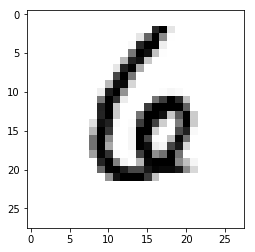


We can use encoding to pass it to trained model and decode data: 


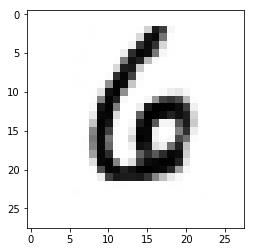

In [98]:
# encoding image into `encoding size` values
encoded_test_image = session.run([encoded], feed_dict={inputs_: [random_test_image]})

# encoding presentation
print("Following " + str(len(encoded_test_image[0][0])) + " numbers:\n")
print(encoded_test_image[0][0])
print("\nRepresents an image: ")
plt.imshow(random_test_image.reshape(28, 28), cmap="gray_r")
plt.show()

# decoding -> recreating image from `encoding size` numbers array
print("\nWe can use encoding to pass it to trained model and decode data: ")
decoded_test_image = session.run([decoded], feed_dict={encoded: [encoded_test_image[0][0]]})

# decoding presentation
plt.imshow(decoded_test_image[0][0].reshape((28, 28)), cmap="gray_r")
plt.show()

More results: 


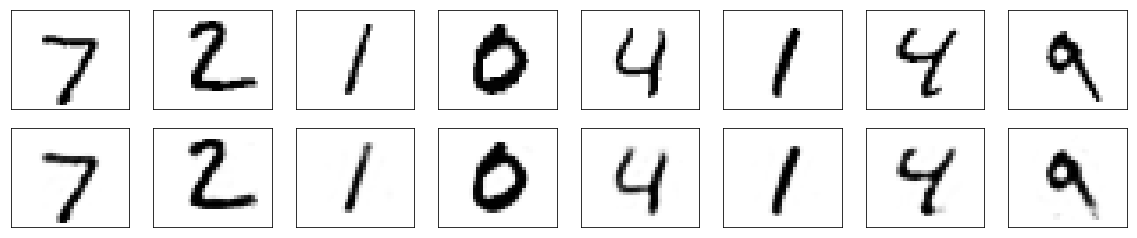

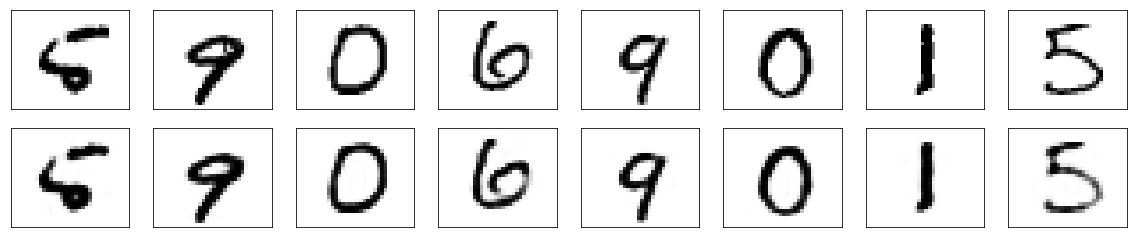

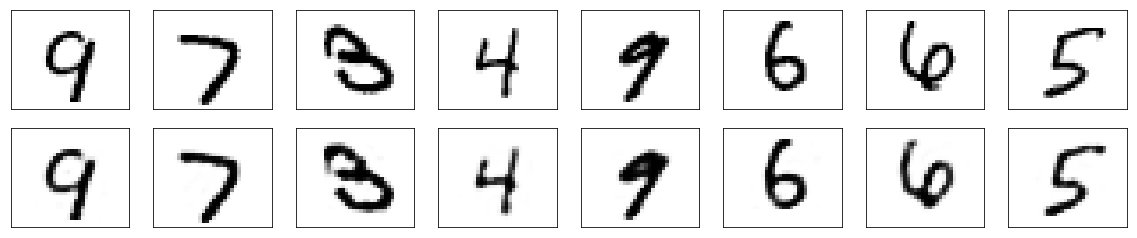

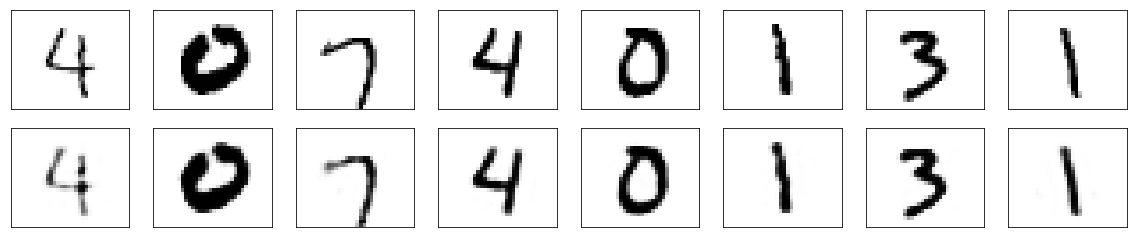

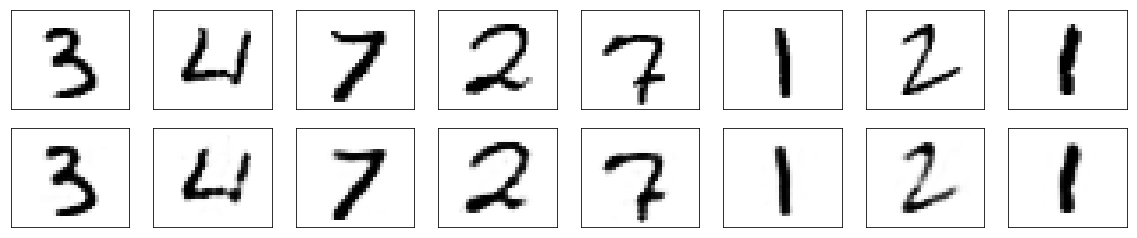

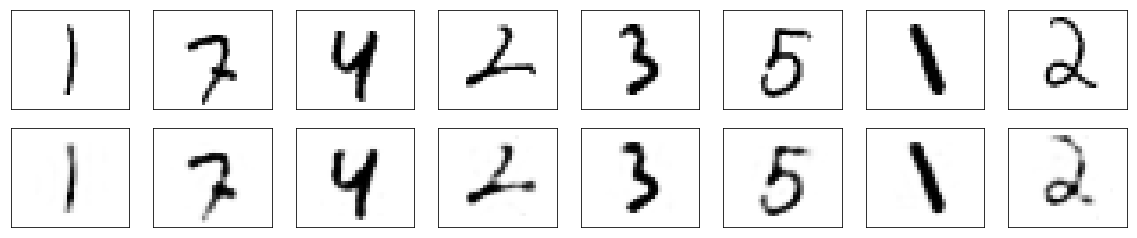

In [105]:
example_rows_to_show = 6

print("More results: ")
for i in range(example_rows_to_show):
    figure, axes = plt.subplots(nrows=2, ncols=8, sharex=True, sharey=True, figsize=(20,4))
    images = test_images[(i*8):(i+1)*8]
    encodings, decodings = session.run([encoded, decoded], feed_dict={inputs_: images})
    
    for images_and_decodings, plot_row in zip([images, decodings], axes):
        for img, ax in zip(images_and_decodings, plot_row):
            ax.imshow(img.reshape((28, 28)), cmap='gray_r')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

In [106]:
session.close()